In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set() # set the default Seaborn style for graphics
import sklearn

# Practical Motivation

Everyone's raving to the newest hit single by the hottest artist. Shopping malls and eateries only play the most trending and most hip songs. Don't we all get tired of those songs after a while? We want to know what makes a song popular, and beyond that a chart topper - and then proceed to flip all of that upside down. We want to uncover the overlooked, misunderstood and underrated, songs that deserve to be played, down supermarket aisles and up on-air. Here's to the undervalued songs!

# Sample Collection &amp; Data Preparation

We are using two datasets: 1) Songs that have been in the global weekly 200 (4087 songs) and 2) A large dataset of songs with audio features and popularity scores (176774 songs)

In [2]:
# songHitData = pd.read_csv('song_hit.csv')
songHitData = pd.read_csv('global_weekly_top_200.csv')
songPopularityData = pd.read_csv('SpotifyFeatures.csv')

print(len(songHitData))
print(len(songPopularityData))

42200
232725


In [3]:
topDF = pd.DataFrame(data = songHitData.drop_duplicates(subset=["track_id"], inplace=False))
print(len(topDF))
topDF

4087


,Unnamed: 0,Position,Track Name,Artist,Streams,URL,filedate,start_week,end_week,track_id
0,0,1,Starboy,The Weeknd,25286465,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2016-12-23--2016-12-30,2016-12-23,2016-12-30,5aAx2yezTd8zXrkmtKl66Z
1,1,2,Closer,The Chainsmokers,22047697,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2016-12-23--2016-12-30,2016-12-23,2016-12-30,7BKLCZ1jbUBVqRi2FVlTVw
2,2,3,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,19794482,https://open.spotify.com/track/5knuzwU65gJK7IF...,2016-12-23--2016-12-30,2016-12-23,2016-12-30,5knuzwU65gJK7IF5yJsuaW
3,3,4,Let Me Love You,DJ Snake,17965723,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2016-12-23--2016-12-30,2016-12-23,2016-12-30,4pdPtRcBmOSQDlJ3Fk945m
4,4,5,Don't Wanna Know,Maroon 5,16966668,https://open.spotify.com/track/5MFzQMkrl1FOOng...,2016-12-23--2016-12-30,2016-12-23,2016-12-30,5MFzQMkrl1FOOng9tq6R9r
...,...,...,...,...,...,...,...,...,...,...
42165,42165,166,Can You Feel My Heart,Bring Me The Horizon,5380466,https://open.spotify.com/track/0WSa1sucoNRcEeU...,2021-01-15--2021-01-22,2021-01-15,2021-01-22,0WSa1sucoNRcEeULlZVQXj
42171,42171,172,Astronaut In The Ocean,Masked Wolf,5295877,https://open.spotify.com/track/3Ofmpyhv5UAQ70m...,2021-01-15--2021-01-22,2021-01-15,2021-01-22,3Ofmpyhv5UAQ70mENzB277
42176,42176,177,Don't Play,Anne-Marie,5119828,https://open.spotify.com/track/4I5bvu2KDsrCg0E...,2021-01-15--2021-01-22,2021-01-15,2021-01-22,4I5bvu2KDsrCg0EWHIcvul
42183,42183,184,Hasta Abajo,Kevin Roldan,4994621,https://open.spotify.com/track/4PEfJZpVjdclfzZ...,2021-01-15--2021-01-22,2021-01-15,2021-01-22,4PEfJZpVjdclfzZ9XO8uDw


In [4]:
songsDF = pd.DataFrame(data = songPopularityData.drop_duplicates(subset=["track_id"], inplace=False))
print(len(songsDF))
songsDF

176774


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.6110,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.2460,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.9520,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.7030,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.9500,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232716,Soul,John Legend,Quickly (feat. Brandy),1U0OMWvR89Cm20vCNar50f,39,0.2310,0.736,222667,0.701,0.000000,A#,0.2030,-4.345,Minor,0.1000,99.991,4/4,0.770
232717,Soul,Belly,P.O.P.,2gGqKJWfWbToha2YmDxnnj,43,0.1040,0.802,201173,0.516,0.000485,D,0.1050,-9.014,Major,0.2130,175.666,4/4,0.482
232719,Soul,"Bobby ""Blue"" Bland",I'll Take Care Of You - Single Version,2iZf3EUedz9MPqbAvXdpdA,32,0.5660,0.423,144667,0.337,0.000000,A#,0.2760,-13.092,Minor,0.0436,80.023,4/4,0.497
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.0329,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969


In [5]:
# merge the two datasets
topDF = topDF[["track_id", "Streams"]]
hitDF = pd.merge(topDF,songsDF, on="track_id")
hitDF

,track_id,Streams,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,7BKLCZ1jbUBVqRi2FVlTVw,22047697,Dance,The Chainsmokers,Closer,86,0.4140,0.748,244960,0.524,0.00000,G#,0.1110,-5.599,Major,0.0338,95.010,4/4,0.661
1,5knuzwU65gJK7IF5yJsuaW,19794482,Dance,Clean Bandit,Rockabye (feat. Sean Paul & Anne-Marie),81,0.4060,0.720,251088,0.763,0.00000,A,0.1800,-4.068,Minor,0.0523,101.965,4/4,0.742
2,6fujklziTHa8uoM5OQSfIo,16831609,Hip-Hop,Rae Sremmurd,Black Beatles,78,0.1420,0.794,291893,0.632,0.00000,C,0.1280,-6.163,Major,0.0649,145.926,4/4,0.355
3,343YBumqHu19cGoGARUTsd,16629189,Hip-Hop,Drake,Fake Love,76,0.1080,0.927,210937,0.488,0.00000,A,0.1960,-9.433,Minor,0.4200,133.987,4/4,0.605
4,6b8Be6ljOzmkOmFslEb23P,16023066,Dance,Bruno Mars,24K Magic,80,0.0340,0.818,225983,0.803,0.00000,C#,0.1530,-4.282,Major,0.0797,106.970,4/4,0.632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,4rHZZAmHpZrA3iH5zx8frV,4988571,Dance,Justin Timberlake,Mirrors,77,0.2340,0.574,484147,0.512,0.00000,F,0.0946,-6.664,Minor,0.0503,76.899,4/4,0.512
1252,7uoFMmxln0GPXQ0AcCBXRq,10233522,Pop,Sia,Snowman,56,0.4830,0.716,165907,0.512,0.00000,C#,0.0928,-6.257,Major,0.0331,104.957,3/4,0.326
1253,1N1ZpYUJc9fwrqk53FGgWv,9474711,Dance,Sia,Santa's Coming For Us,57,0.0205,0.669,206533,0.854,0.00000,C#,0.0470,-4.486,Major,0.0999,93.057,4/4,0.707
1254,0Ie5uiv54KgCr7P4sYDTHl,8160534,Movie,Idina Menzel,Baby It's Cold Outside (duet with Michael Bublé),56,0.6470,0.553,166147,0.476,0.00000,C,0.2810,-8.869,Major,0.0649,113.401,3/4,0.558


We can hence identify 1256 songs that were in the weekly top 200 at some point, out of our huge dataset of 176774 songs. We shall call these songs our Hit Songs.

## Exploratory Analysis of Hit Songs

### What is the distribution of streams?

In [6]:
streams = pd.DataFrame(data=hitDF["Streams"])
streams.describe()

,Streams
count,1.256000e+03
mean,7.909919e+06
std,6.560553e+06
min,2.580512e+06
25%,4.292898e+06
50%,5.371360e+06
75%,8.947454e+06
max,7.146787e+07


<AxesSubplot:>

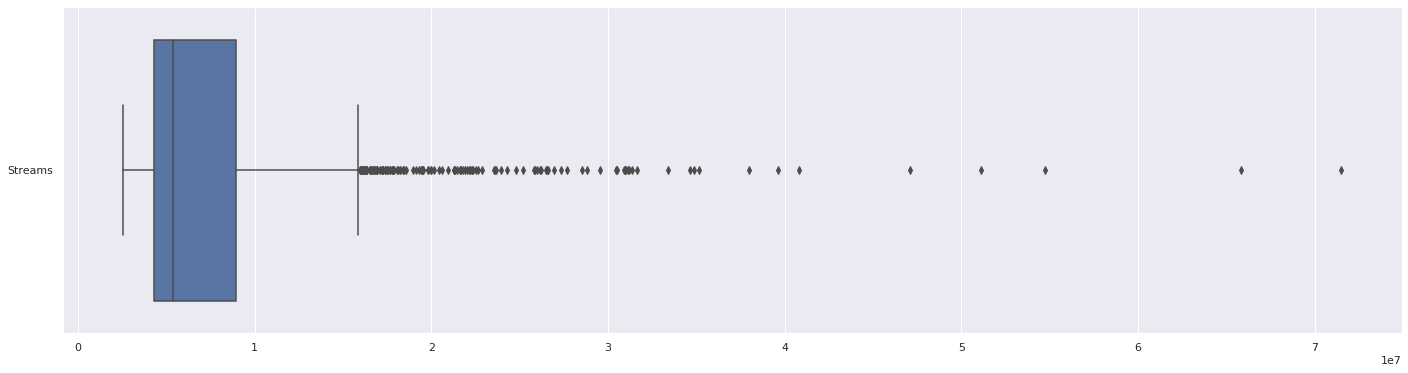

In [7]:
# boxplot
f = plt.figure(figsize=(24, 6))
sb.boxplot(data = streams, orient="h")

<AxesSubplot:ylabel='Count'>

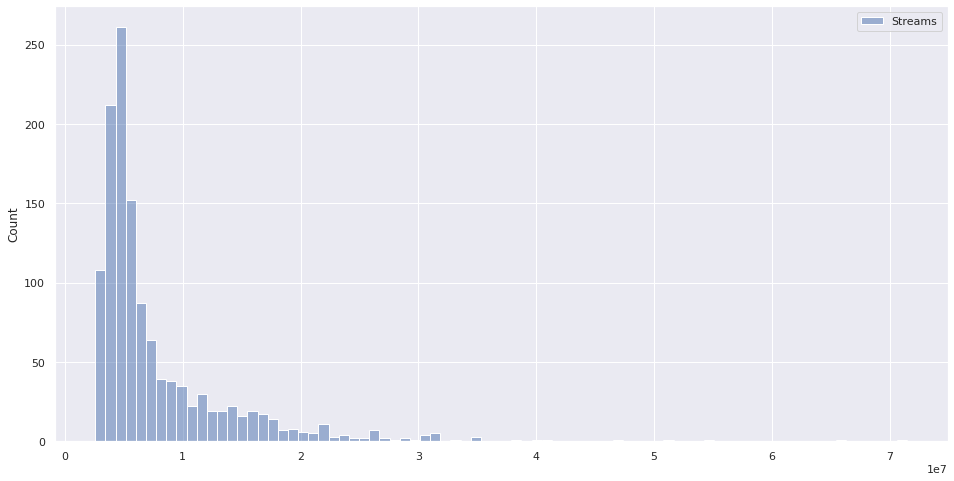

In [8]:
# histogram
f = plt.figure(figsize=(16, 8))
sb.histplot(data=streams)

It seems like the number of streams tends to have many outliers beyond q3 + 1.5IQR, which explains why the mean is much higher than the median. This means that some songs individually are streamed much more than other songs, even within the top songs.

### What is the distribution of popularity scores?

In [9]:
popularity = pd.DataFrame(data=hitDF["popularity"])
popularity.describe()

,popularity
count,1256.000000
mean,75.386146
std,9.548856
min,0.000000
25%,69.000000
50%,76.000000
75%,82.000000
max,100.000000


<AxesSubplot:>

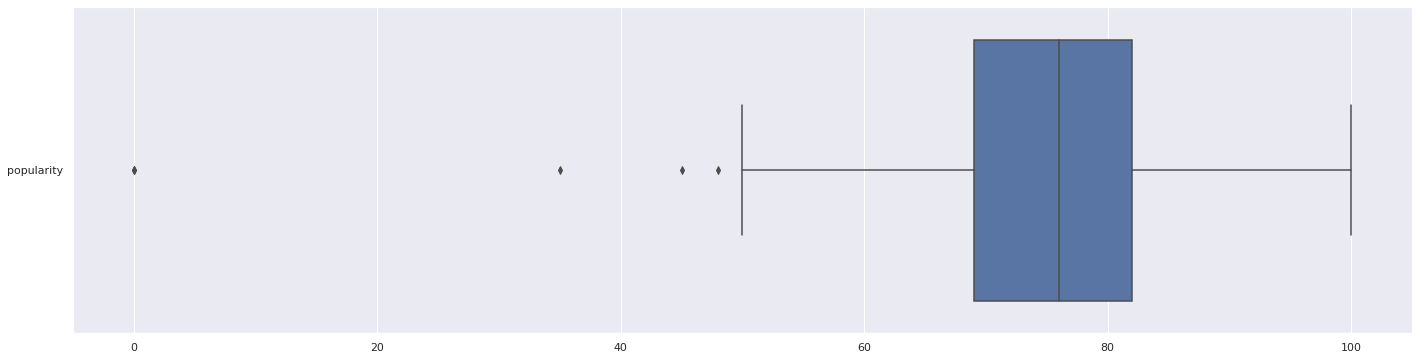

In [10]:
f = plt.figure(figsize=(24, 6))
sb.boxplot(data=popularity, orient="h")

<AxesSubplot:ylabel='Count'>

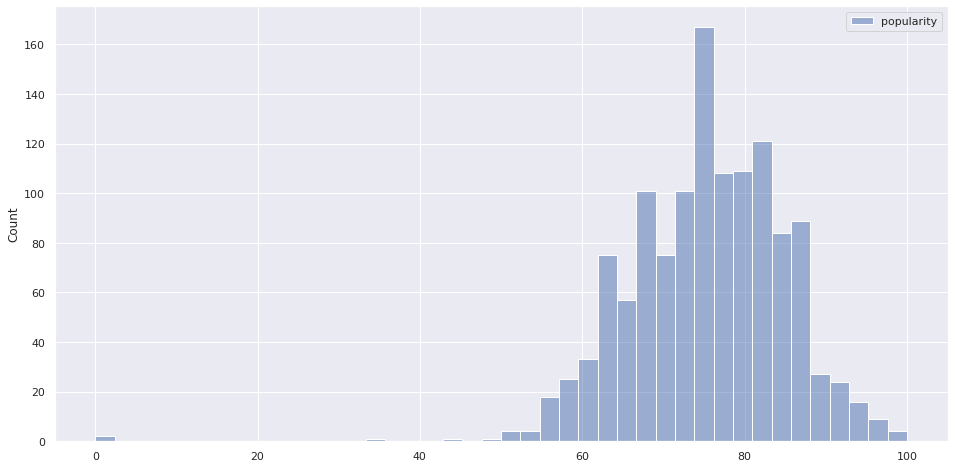

In [11]:
f = plt.figure(figsize=(16, 8))
sb.histplot(data=popularity)

<AxesSubplot:>

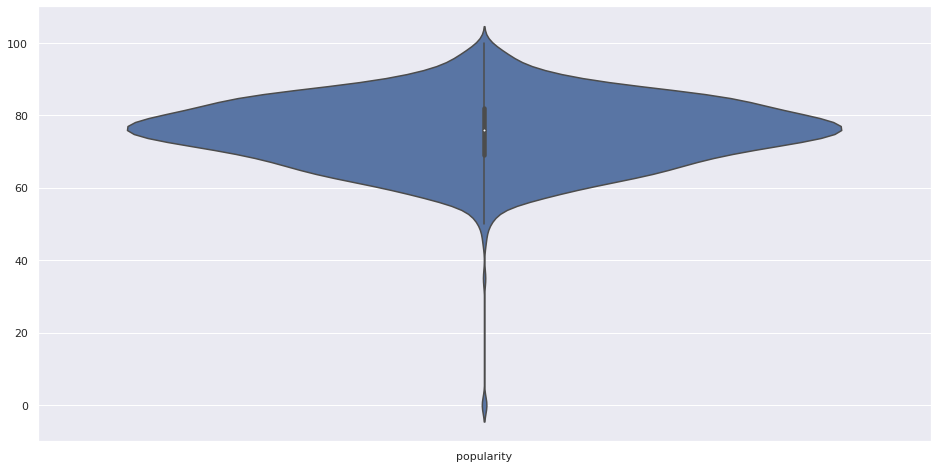

In [12]:
f = plt.figure(figsize=(16, 8))
sb.violinplot(data=popularity)

A stingray! Seems like a majority of hit songs have very high popularity scores, as expected. The distribution is symmetrical, with the mean being very close to the median (75-76), resembling a normal distribution. With the exception of some outliers that have very low popularity scores, it is safe to say that hit songs are also generally popular songs.  

### Which artist had the most hits?

In [13]:
# bar chart by artist
artistDF = pd.DataFrame()
artistDF['artist_name'] = hitDF['artist_name'].astype('category')
artistCount = artistDF.groupby(['artist_name']).size().to_frame(name = 'count').reset_index()

artistCount.sort_values(by=["count"], ascending=False, inplace=True)
top25 = artistCount[:25]
top25


,artist_name,count
356,XXXTENTACION,36
87,Drake,34
23,Ariana Grande,27
201,Logic,25
195,Lil Wayne,23
272,Post Malone,23
230,Migos,22
92,Ed Sheeran,21
28,BTS,21
338,Travis Scott,18


<AxesSubplot:xlabel='artist_name'>

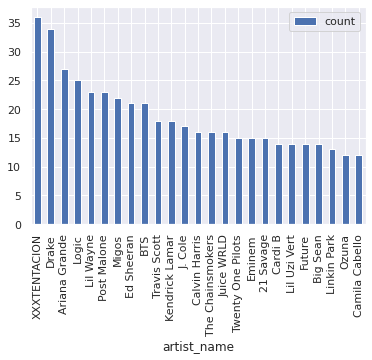

In [14]:
top25.plot.bar(x="artist_name", y="count", rot=90)

It seems like XXXTENTACION has dropped a lot of hits throughout his short career. Died too soon. RIP

What is the distribution of genres?

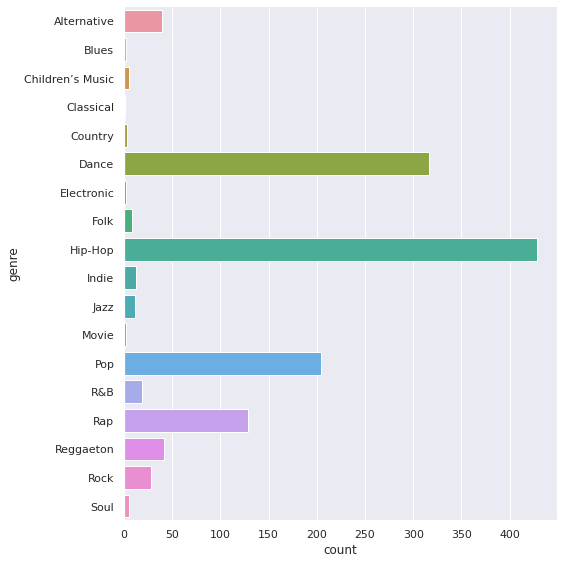

In [15]:
# bar chart by genre
genreDF = pd.DataFrame()
genreDF['genre'] = hitDF['genre'].astype('category')
sb.catplot(y = 'genre', data = genreDF, kind = "count", height = 8)

In [16]:
genreDF.groupby(['genre']).size()

genre
Alternative          39
Blues                 2
Children’s Music      5
Classical             1
Country               3
Dance               316
Electronic            2
Folk                  8
Hip-Hop             428
Indie                12
Jazz                 11
Movie                 2
Pop                 204
R&B                  19
Rap                 129
Reggaeton            42
Rock                 28
Soul                  5
dtype: int64

## Forming our Hit vs Non-Hit Songs Dataset

We first remove the less significant songs by genre from our hitDF, and keep songs from the more common genres. 

In [17]:
hitDF = hitDF[(hitDF['genre'] == 'Hip-Hop') | (hitDF['genre'] == 'Dance') | 
(hitDF['genre'] == 'Pop') | (hitDF['genre'] == 'Rap') |
(hitDF['genre'] == 'Alternative') | (hitDF['genre'] == 'Reggaeton') |
(hitDF['genre'] == 'Rock')]

hitSongs = pd.merge(hitDF['track_id'], songsDF, on="track_id")
hitSongs

,track_id,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,7BKLCZ1jbUBVqRi2FVlTVw,Dance,The Chainsmokers,Closer,86,0.41400,0.748,244960,0.524,0.00000,G#,0.1110,-5.599,Major,0.0338,95.010,4/4,0.661
1,5knuzwU65gJK7IF5yJsuaW,Dance,Clean Bandit,Rockabye (feat. Sean Paul & Anne-Marie),81,0.40600,0.720,251088,0.763,0.00000,A,0.1800,-4.068,Minor,0.0523,101.965,4/4,0.742
2,6fujklziTHa8uoM5OQSfIo,Hip-Hop,Rae Sremmurd,Black Beatles,78,0.14200,0.794,291893,0.632,0.00000,C,0.1280,-6.163,Major,0.0649,145.926,4/4,0.355
3,343YBumqHu19cGoGARUTsd,Hip-Hop,Drake,Fake Love,76,0.10800,0.927,210937,0.488,0.00000,A,0.1960,-9.433,Minor,0.4200,133.987,4/4,0.605
4,6b8Be6ljOzmkOmFslEb23P,Dance,Bruno Mars,24K Magic,80,0.03400,0.818,225983,0.803,0.00000,C#,0.1530,-4.282,Major,0.0797,106.970,4/4,0.632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,4kflIGfjdZJW4ot2ioixTB,Pop,Adele,Someone Like You,79,0.89200,0.559,285040,0.330,0.00000,A,0.0975,-8.251,Major,0.0285,135.109,4/4,0.285
1182,3AJwUDP919kvQ9QcozQPxg,Pop,Coldplay,Yellow,82,0.00239,0.429,266773,0.661,0.00013,B,0.2340,-7.227,Major,0.0281,173.365,4/4,0.285
1183,4rHZZAmHpZrA3iH5zx8frV,Dance,Justin Timberlake,Mirrors,77,0.23400,0.574,484147,0.512,0.00000,F,0.0946,-6.664,Minor,0.0503,76.899,4/4,0.512
1184,7uoFMmxln0GPXQ0AcCBXRq,Pop,Sia,Snowman,56,0.48300,0.716,165907,0.512,0.00000,C#,0.0928,-6.257,Major,0.0331,104.957,3/4,0.326


We now have 1186 hit songs, which we will remove from our songsDF. We then select another 1186 songs, by the same genre distribution, assuming they are all non-hits. 

In [18]:
# removing 1186 hits
songsDF = pd.concat([hitSongs, songsDF]).drop_duplicates(keep=False)
songsDF


,track_id,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0BRjO6ga9RKCKjfDqeFgWV,Movie,Henri Salvador,C'est beau de faire un Show,0,0.6110,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,0BjC1NfoEOOusryehmNudP,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.2460,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,0CoSDzoNIKCRs124s9uTVy,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.9520,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,0Gc6TVm52BwZD07Ki6tIvf,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.7030,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,0IuslXpMROHdEPvSl1fTQK,Movie,Fabien Nataf,Ouverture,4,0.9500,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232716,1U0OMWvR89Cm20vCNar50f,Soul,John Legend,Quickly (feat. Brandy),39,0.2310,0.736,222667,0.701,0.000000,A#,0.2030,-4.345,Minor,0.1000,99.991,4/4,0.770
232717,2gGqKJWfWbToha2YmDxnnj,Soul,Belly,P.O.P.,43,0.1040,0.802,201173,0.516,0.000485,D,0.1050,-9.014,Major,0.2130,175.666,4/4,0.482
232719,2iZf3EUedz9MPqbAvXdpdA,Soul,"Bobby ""Blue"" Bland",I'll Take Care Of You - Single Version,32,0.5660,0.423,144667,0.337,0.000000,A#,0.2760,-13.092,Minor,0.0436,80.023,4/4,0.497
232721,1qWZdkBl4UVPj9lK6HuuFM,Soul,Jr Thomas & The Volcanos,Burning Fire,38,0.0329,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969


Note: This is based on the assumption that a song is strictly only considered a hit song if it appears in our global weekly top 200 dataset. Of course, there may be exceptions, such as hit songs that are not considered because they entered the weekly top 200 at a time outside what the topDF dataset has captured. These exceptions will not be considered in the interest of our projects' scope, but we do believe that these exceptions are among the minority, since only a small percentage of songs make the top 200 charts in the first place.

In [19]:
# Alternative          39
# Dance               316
# Hip-Hop             428
# Pop                 204
# Rap                 129
# Reggaeton            42
# Rock                 28

alt = songsDF[songsDF["genre"] == "Alternative"].sample(n=39)
dance = songsDF[songsDF["genre"] == "Dance"].sample(n=316)
hiphop = songsDF[songsDF["genre"] == "Hip-Hop"].sample(n=428)
pop = songsDF[songsDF["genre"] == "Pop"].sample(n=204)
rap = songsDF[songsDF["genre"] == "Rap"].sample(n=129)
reg = songsDF[songsDF["genre"] == "Reggaeton"].sample(n=42)
rock = songsDF[songsDF["genre"] == "Rock"].sample(n=28)
nonHitSongs = pd.concat([alt,dance,hiphop,pop,rap,reg,rock])
nonHitSongs

,track_id,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
5096,6Km73Tlvi4yS2e4XaIuXek,Alternative,Rejjie Snow,23,51,0.27600,0.803,181613,0.6370,0.000017,E,0.2200,-7.191,Minor,0.1050,97.032,4/4,0.500
12102,5vujcl17dn04lMgBGtI3Kf,Alternative,Halestorm,I'm Not an Angel,42,0.02200,0.395,194867,0.7200,0.000000,B,0.1550,-4.227,Minor,0.0314,150.421,3/4,0.260
5644,6lKKCEeRunxMGM8xgejlyd,Alternative,Berhana,Whole Wide World,49,0.84900,0.508,243160,0.4570,0.000000,E,0.0989,-7.320,Major,0.0383,100.221,4/4,0.487
1517,4ThyHM57HG7pnLudis9b0M,Alternative,Jhene Aiko,Promises,60,0.67100,0.494,297493,0.4710,0.000042,F#,0.0699,-11.238,Minor,0.0699,80.367,3/4,0.219
27250,6Xmf2Rn6AvBeZSNkZx5z0C,Alternative,Like Pacific,Distant,42,0.00863,0.576,195320,0.9720,0.000000,C#,0.2250,-2.982,Major,0.0801,144.008,3/4,0.378
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154624,407ltk0BtcZI8kgu0HH4Yj,Rock,Nick Cave & The Bad Seeds,Into My Arms - 2011 Remastered Version,64,0.89400,0.484,256120,0.0874,0.154000,C,0.1100,-17.796,Major,0.0394,94.163,4/4,0.219
224567,4sjLcE0GQ6urc4iUXsUPe9,Rock,Thirty Seconds To Mars,Kings And Queens,63,0.04010,0.293,347667,0.8160,0.000029,G#,0.1300,-5.432,Major,0.0844,164.982,4/4,0.148
222310,3hJLKtTpgct9Y9wKww0BiR,Rock,The Rolling Stones,Miss You - Remastered,66,0.46200,0.803,288667,0.7250,0.013700,A,0.4600,-4.726,Minor,0.0432,109.700,4/4,0.785
153831,6iXQrhhgBisdfvS34EMTZ3,Rock,Barry Manilow,Mandy,67,0.41800,0.308,213333,0.4640,0.000002,A#,0.1430,-9.032,Major,0.0279,103.734,4/4,0.318


In [20]:
# check that hit songs and non hit songs do not overlap
check = pd.merge(nonHitSongs,hitSongs, on="track_id")
check

,track_id,genre_x,artist_name_x,track_name_x,popularity_x,acousticness_x,danceability_x,duration_ms_x,energy_x,instrumentalness_x,...,energy_y,instrumentalness_y,key_y,liveness_y,loudness_y,mode_y,speechiness_y,tempo_y,time_signature_y,valence_y


The non-hit songs are combined with the hit songs to form a dataset with equal number of hit songs and non-hit songs, called mainDF. A boolean column "hit" is added to keep track of whether a song was a hit or not. This will be the main dataset we will be working with.

In [21]:
hitSongs["hit"] = 1
nonHitSongs["hit"] = 0
mainDF = pd.concat([hitSongs,nonHitSongs])
# mainDF.drop(['mode','key', 'time_signature'], axis=1, inplace=True)
mainDF

,track_id,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,hit
0,7BKLCZ1jbUBVqRi2FVlTVw,Dance,The Chainsmokers,Closer,86,0.41400,0.748,244960,0.5240,0.000000,G#,0.1110,-5.599,Major,0.0338,95.010,4/4,0.661,1
1,5knuzwU65gJK7IF5yJsuaW,Dance,Clean Bandit,Rockabye (feat. Sean Paul & Anne-Marie),81,0.40600,0.720,251088,0.7630,0.000000,A,0.1800,-4.068,Minor,0.0523,101.965,4/4,0.742,1
2,6fujklziTHa8uoM5OQSfIo,Hip-Hop,Rae Sremmurd,Black Beatles,78,0.14200,0.794,291893,0.6320,0.000000,C,0.1280,-6.163,Major,0.0649,145.926,4/4,0.355,1
3,343YBumqHu19cGoGARUTsd,Hip-Hop,Drake,Fake Love,76,0.10800,0.927,210937,0.4880,0.000000,A,0.1960,-9.433,Minor,0.4200,133.987,4/4,0.605,1
4,6b8Be6ljOzmkOmFslEb23P,Dance,Bruno Mars,24K Magic,80,0.03400,0.818,225983,0.8030,0.000000,C#,0.1530,-4.282,Major,0.0797,106.970,4/4,0.632,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154624,407ltk0BtcZI8kgu0HH4Yj,Rock,Nick Cave & The Bad Seeds,Into My Arms - 2011 Remastered Version,64,0.89400,0.484,256120,0.0874,0.154000,C,0.1100,-17.796,Major,0.0394,94.163,4/4,0.219,0
224567,4sjLcE0GQ6urc4iUXsUPe9,Rock,Thirty Seconds To Mars,Kings And Queens,63,0.04010,0.293,347667,0.8160,0.000029,G#,0.1300,-5.432,Major,0.0844,164.982,4/4,0.148,0
222310,3hJLKtTpgct9Y9wKww0BiR,Rock,The Rolling Stones,Miss You - Remastered,66,0.46200,0.803,288667,0.7250,0.013700,A,0.4600,-4.726,Minor,0.0432,109.700,4/4,0.785,0
153831,6iXQrhhgBisdfvS34EMTZ3,Rock,Barry Manilow,Mandy,67,0.41800,0.308,213333,0.4640,0.000002,A#,0.1430,-9.032,Major,0.0279,103.734,4/4,0.318,0


### Comparing popularity distribution between hit and non-hit songs

ValueError: cannot reindex from a duplicate axis

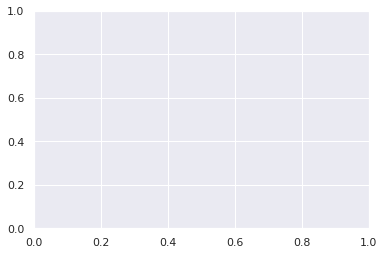

In [22]:
compare= mainDF[['popularity','hit']]
sb.kdeplot(data=compare, x="popularity", hue="hit")

It is evident that hit songs generally have a higher skewed popularity distribution than non-hit songs, but the plot shows that the 2 distributions do overlap at popularity scores of around 50 to 85. These are the songs that we are interested in!

### Train-test Split

With our data prepared, we now shuffle and split our dataset into the train and test data for our predictions to come

In [ ]:
# shuffle the df
mainDF = sklearn.utils.shuffle(mainDF)
mainDF.reset_index(inplace=True)
mainDF.drop(columns=["index"], inplace=True)
mainDF

,track_id,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,hit
0,0jMo6rlrSGVRIipK0isKFL,Pop,Filmore,Country Song,59,0.0523,0.619,166739,0.684,0.000000,C#,0.1350,-5.616,Major,0.0441,95.990,4/4,0.8140,0
1,41NPmOc9fdROE5o1BpCn2w,Pop,LEGADO 7,El Doble M,60,0.5170,0.804,146749,0.810,0.000182,G,0.1820,-2.709,Major,0.0410,109.928,3/4,0.9630,0
2,1VJwtWR6z7SpZRwipI12be,Alternative,Doja Cat,Candy,54,0.5130,0.689,190920,0.516,0.000000,G#,0.1630,-5.857,Major,0.0444,124.876,4/4,0.2090,1
3,1ZY1PqizIl78geGM4xWlEA,Dance,Taylor Swift,Gorgeous,72,0.0713,0.800,209680,0.535,0.000009,G,0.2130,-6.684,Major,0.1350,92.027,4/4,0.4510,1
4,2jTujnt0y344ai1rNOywgr,Hip-Hop,Drake,KMT,67,0.0143,0.872,162638,0.623,0.021400,C#,0.1250,-6.984,Major,0.0446,119.983,4/4,0.0883,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2367,6yly6C4QeDi4N1CpnFrJc7,Hip-Hop,Santa Estilo,Pesao,67,0.2380,0.720,208027,0.721,0.000000,G,0.2940,-4.564,Minor,0.2620,173.432,4/4,0.8920,0
2368,4y3OI86AEP6PQoDE6olYhO,Dance,Jonas Brothers,Sucker,91,0.0436,0.846,181040,0.731,0.000000,C#,0.0949,-5.027,Minor,0.0640,137.947,4/4,0.9330,1
2369,1npAUoLKDnpqpjyDDHmI1j,Hip-Hop,Oliver Francis,Headphones,56,0.2750,0.389,223412,0.559,0.000389,E,0.0929,-9.530,Minor,0.1260,77.868,4/4,0.0686,0
2370,5wihevBA7MO9PNYyWyTfkh,Hip-Hop,Migos,Brown Paper Bag,59,0.0477,0.907,211244,0.489,0.000000,G#,0.1150,-5.790,Major,0.1580,136.982,4/4,0.2530,1


We then do a uniformly random 80-20 train-test split that will be used for all subsequent problems.

In [ ]:
# 80-20 split
trainDF = mainDF[:1898]
testDF = mainDF[-474:]
print(len(trainDF))
print(len(testDF))

1898
474


# 

# Problem Formulation

## Pattern Recognition in Popularity and Hit Status

## 1) Which audio features are most important in determining song popularity? (WB)

### Continuous Variables

<AxesSubplot:>

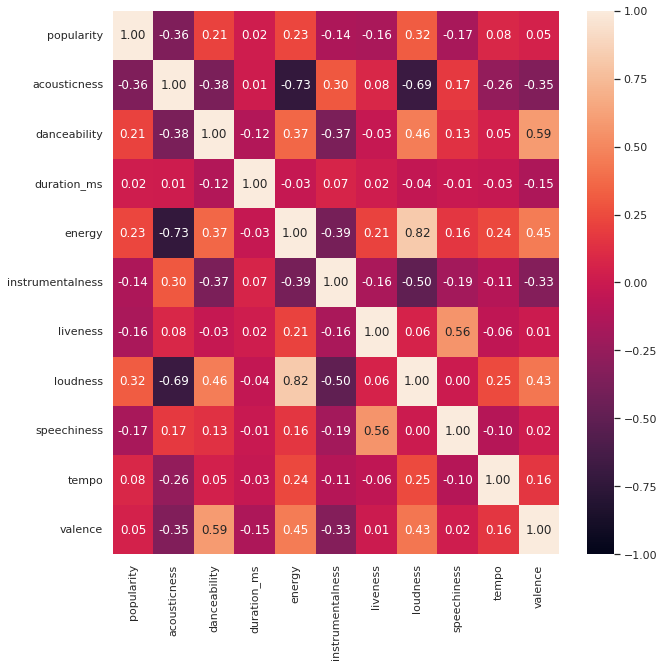

In [ ]:
f = plt.figure(figsize=(10, 10))
sb.heatmap(songsDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

We observe that loudness is strongly correlated with energy, which make sense since loud songs are usually energetic and vice versa.  Energy and loudness also have a strong negative correlation with acousticness, since acoustic songs tend to be softer and more mellow. However, it seems that there is poor correlation between all the audio feature variables and popularity scores, so we will choose the 3 features with the strongest correlations, which are acousticness, loudness and energy.

In [ ]:
# # from ds find the corl btw each audio feature and popularity score 
# # to find out the top determinants of a popular song

# # compare numerical variables
# audioNumDF = mainDF.drop(columns=["hit"], inplace = False)

# # Heatmap of the Correlation Matrix
# f = plt.figure(figsize=(10, 10))
# sb.heatmap(audioNumDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

We observe that loudness is strongly correlated with energy with a correlation coefficient of 0.7, which make sense since loud songs are usually energetic and vice versa.  Energy and loudness also have a negative correlation with acousticness, since acoustic songs tend to be softer and more mellow. However, it seems that there is poor correlation between all the audio feature variables and popularity scores, so we will choose the 3 features with the strongest correlations, which are danceability, energy and instrumentalness.

### Categorical Variables

<AxesSubplot:xlabel='key', ylabel='popularity'>

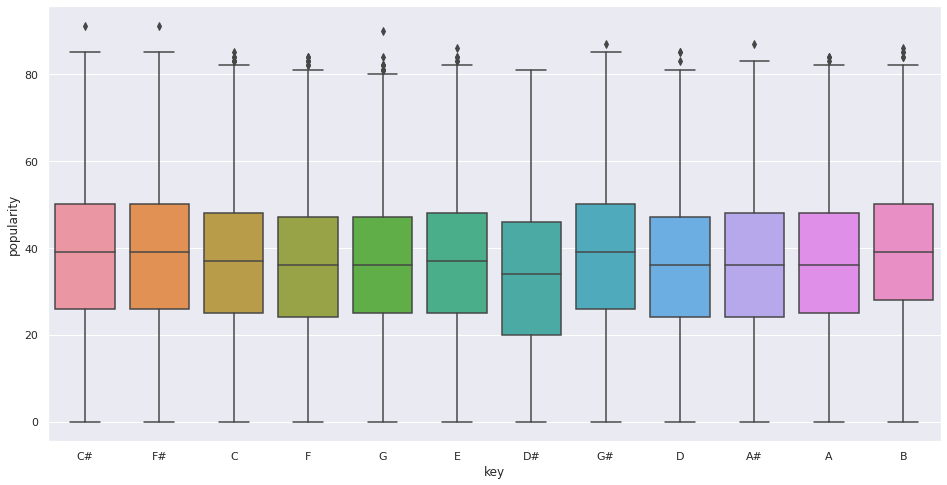

In [ ]:
# compare categorical features - plot boxplot of each feature against popularity
# audioCatDF = pd.DataFrame(mainDF[["popularity","key", "mode", "time_signature", "genre"]])

keyPopularity = songsDF[['key', 'popularity']]

f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'key', y = 'popularity', data = keyPopularity)

<AxesSubplot:xlabel='mode', ylabel='popularity'>

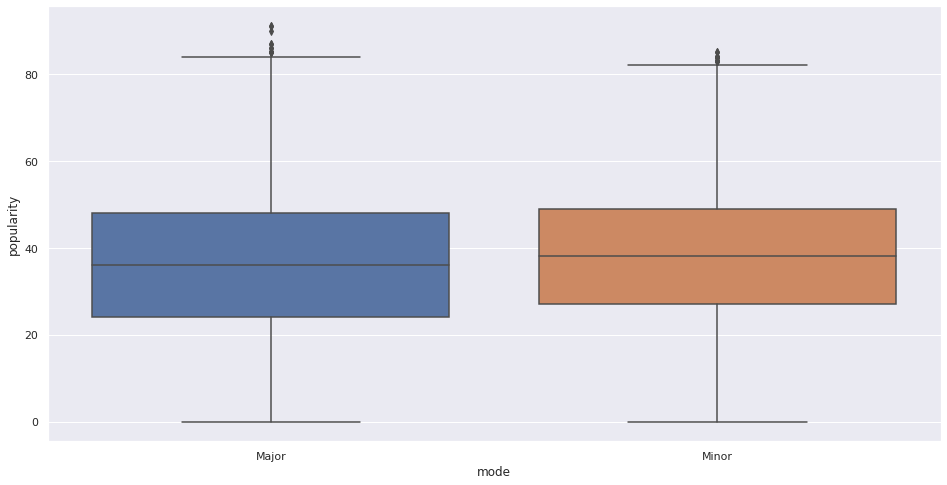

In [ ]:
modePopularity = songsDF[['mode', 'popularity']]
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'mode', y = 'popularity', data = modePopularity)

<AxesSubplot:xlabel='time_signature', ylabel='popularity'>

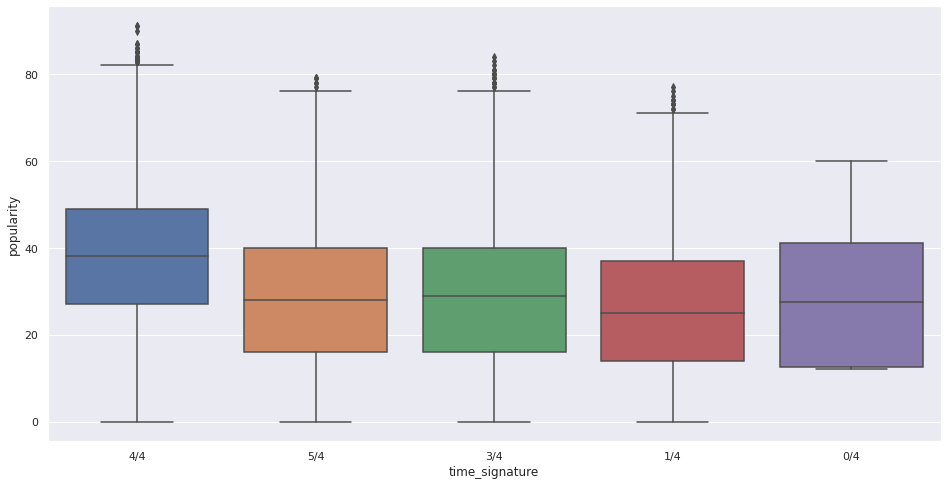

In [ ]:
tsPopularity = songsDF[['time_signature', 'popularity']]
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'time_signature', y = 'popularity', data = tsPopularity)

<AxesSubplot:xlabel='genre', ylabel='popularity'>

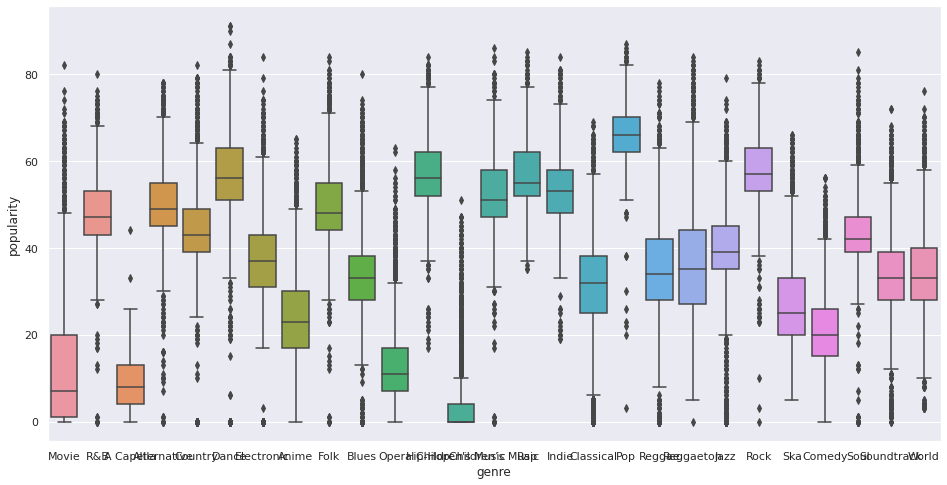

In [ ]:
genrePopularity = songsDF[['genre', 'popularity']]
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'genre', y = 'popularity', data = genrePopularity)

It seems like out of all the categorical variables, the variance in popularity is the greatest across genres. We can see that Pop, Rap, Dance and Hip-Hop songs tend to have higher mean popularity scores and greater distribution towards higher popularity scores than lower. This is probably because these 4 genres are the 4 largest genres in terms of proportion in our hit songs dataset. 

## 2) Which audio features are most important in determining if a song was a hit? (XZ)

### Numerical Features

In [ ]:
#  from dataset find relationships between whether a song was a hit vs its audio features
# For comparing numeric features
audioNumHitDF = pd.DataFrame(mainDF[["hit", "acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence"]])
audioNumHitDF

,hit,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,0,0.0523,0.619,166739,0.684,0.000000,0.1350,-5.616,0.0441,95.990,0.8140
1,0,0.5170,0.804,146749,0.810,0.000182,0.1820,-2.709,0.0410,109.928,0.9630
2,1,0.5130,0.689,190920,0.516,0.000000,0.1630,-5.857,0.0444,124.876,0.2090
3,1,0.0713,0.800,209680,0.535,0.000009,0.2130,-6.684,0.1350,92.027,0.4510
4,1,0.0143,0.872,162638,0.623,0.021400,0.1250,-6.984,0.0446,119.983,0.0883
...,...,...,...,...,...,...,...,...,...,...,...
2367,0,0.2380,0.720,208027,0.721,0.000000,0.2940,-4.564,0.2620,173.432,0.8920
2368,1,0.0436,0.846,181040,0.731,0.000000,0.0949,-5.027,0.0640,137.947,0.9330
2369,0,0.2750,0.389,223412,0.559,0.000389,0.0929,-9.530,0.1260,77.868,0.0686
2370,1,0.0477,0.907,211244,0.489,0.000000,0.1150,-5.790,0.1580,136.982,0.2530


<AxesSubplot:>

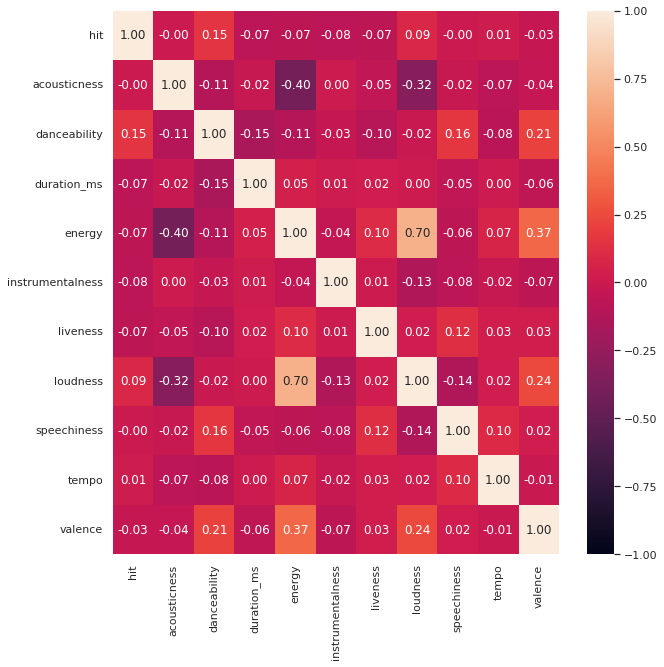

In [ ]:
f = plt.figure(figsize=(10, 10))
sb.heatmap(audioNumHitDF.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

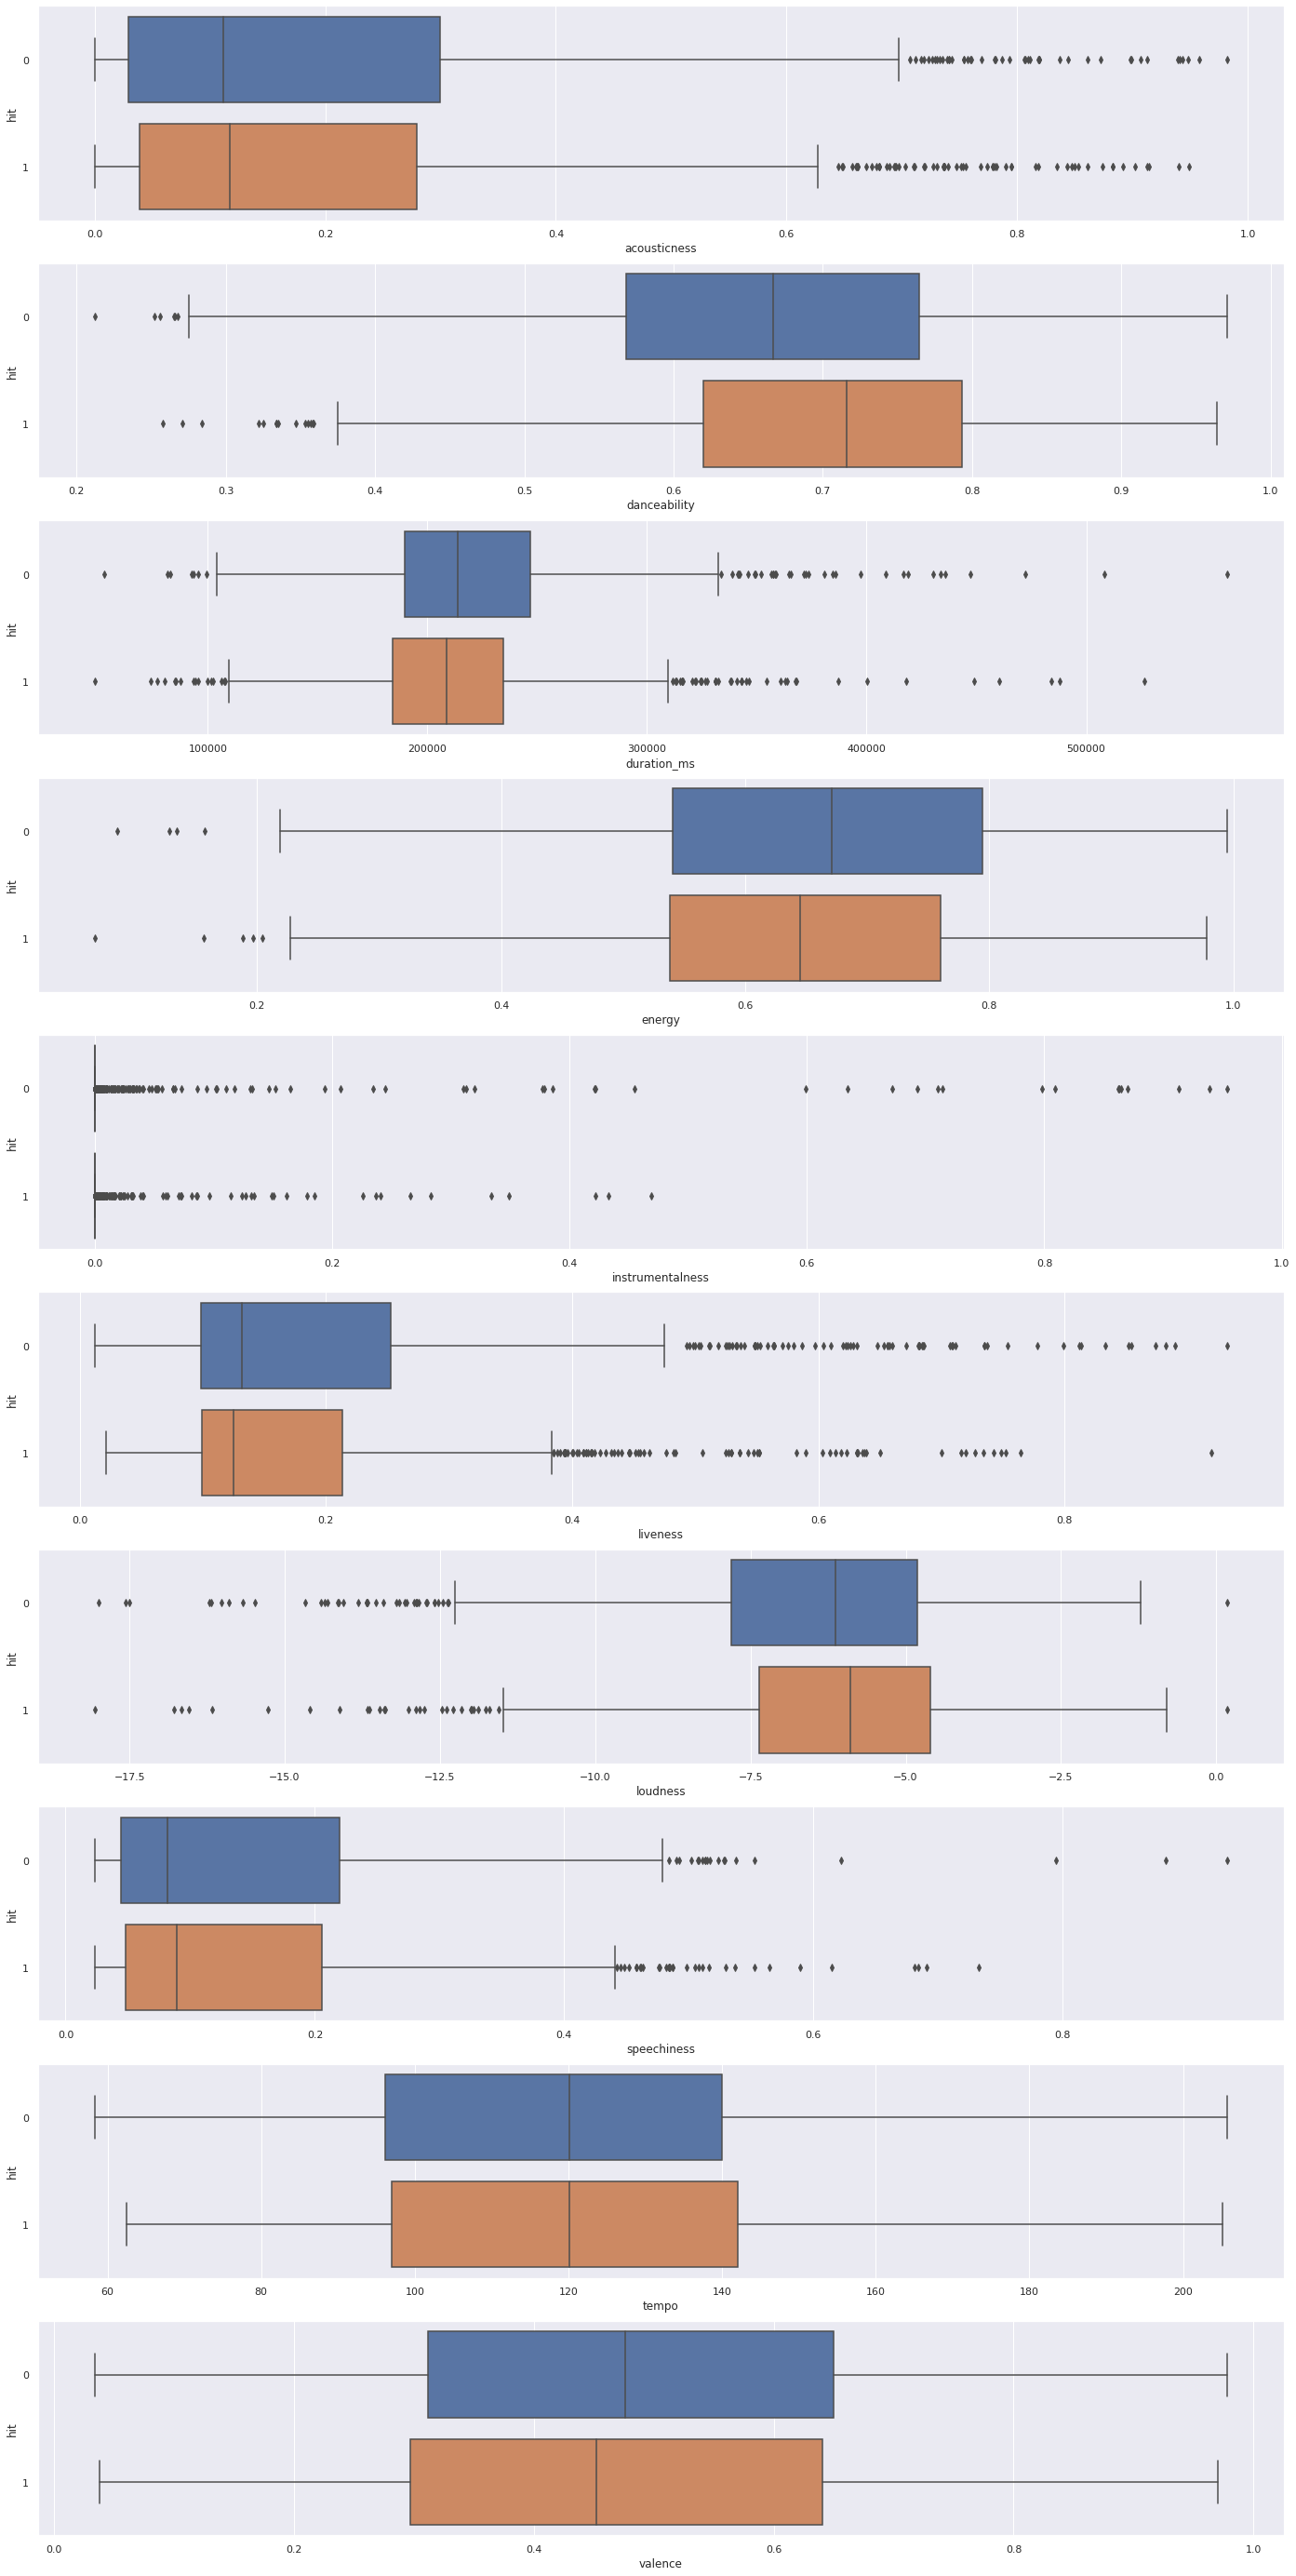

In [ ]:
audioNumFeatures = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo", "valence"]
f, axes = plt.subplots(len(audioNumFeatures), 1, figsize=(24, 50))
index = 0

for var in audioNumFeatures:
    sb.boxplot(data = audioNumHitDF, x = audioNumHitDF[var], y = 'hit', ax=axes[index], orient="h")
    index += 1

From the boxplots, it is hard to visibly tell which audio feature has a greater impact on whether a song is a hit. Every feature has a significant overlap in terms of the region of the hit versus no hit box although some overlap slightly lesser. To avoid unaccurate judgement via the human eyes, we will turn to using Decision Tree

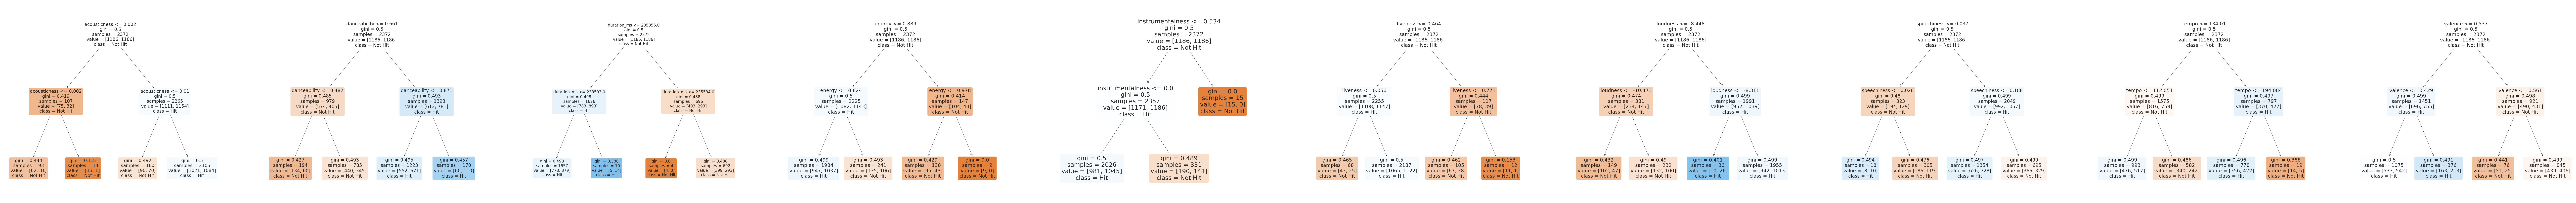

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

# Classification Tree model of max depth 2
dec2tree = DecisionTreeClassifier(max_depth = 2)
f, axes = plt.subplots(1, len(audioNumFeatures), figsize=(250, 20), dpi=80)
index = 0

for var in audioNumFeatures:
    dec2tree.fit(pd.DataFrame(audioNumHitDF[var]), pd.DataFrame(audioNumHitDF['hit']))
    plot_tree(dec2tree, filled=True, rounded=True, feature_names=[var], class_names=["Not Hit","Hit"], ax=axes[index])
    index += 1

To check how good the predictions are, we use classification accuracy and confusion matrix

In [ ]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

# For Qn 5 use since classification accuracy will change when notebook is rerun
classification_accuracy_numerical_audio_features_list = []

for var in audioNumFeatures:
    print("Classification Accuracy for " + var + ":", dec2tree.score(pd.DataFrame(audioNumHitDF[var]), pd.DataFrame(audioNumHitDF['hit'])))
    classification_accuracy_numerical_audio_features_list.append((var, dec2tree.score(pd.DataFrame(audioNumHitDF[var]), pd.DataFrame(audioNumHitDF['hit']))))


Classification Accuracy for acousticness: 0.5012647554806071
Classification Accuracy for danceability: 0.45952782462057334
Classification Accuracy for duration_ms: 0.5
Classification Accuracy for energy: 0.5029510961214165
Classification Accuracy for instrumentalness: 0.5063237774030354
Classification Accuracy for liveness: 0.5113827993254637
Classification Accuracy for loudness: 0.5
Classification Accuracy for speechiness: 0.49873524451939294
Classification Accuracy for tempo: 0.5
Classification Accuracy for valence: 0.5248735244519392
[('acousticness', 0.5012647554806071), ('danceability', 0.45952782462057334), ('duration_ms', 0.5), ('energy', 0.5029510961214165), ('instrumentalness', 0.5063237774030354), ('liveness', 0.5113827993254637), ('loudness', 0.5), ('speechiness', 0.49873524451939294), ('tempo', 0.5), ('valence', 0.5248735244519392)]


While it seems like none of the audio feature are able to accurately distinguish a song as a hit, the classification accuracy for energy stands out above the rest at 4% above the nearest neighbour. If you want to produce a hit song, you can't go wrong injecting a bit more energy ~cue Oppa Gangnam Style (probably need to rewrite conclusion for this question each time the notebook is compiled since the classification accuracy seems to change depending on the data used)

# Categorical Features

In [ ]:
# For comparing categorical features
audioCatHitDF = pd.DataFrame(mainDF[["hit", "key", "mode", "time_signature", "genre"]])
audioCatHitDF

,hit,key,mode,time_signature,genre
0,0,C#,Major,4/4,Pop
1,0,G,Major,3/4,Pop
2,1,G#,Major,4/4,Alternative
3,1,G,Major,4/4,Dance
4,1,C#,Major,4/4,Hip-Hop
...,...,...,...,...,...
2367,0,G,Minor,4/4,Hip-Hop
2368,1,C#,Minor,4/4,Dance
2369,0,E,Minor,4/4,Hip-Hop
2370,1,G#,Major,4/4,Hip-Hop


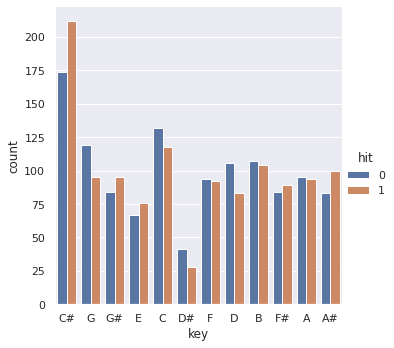

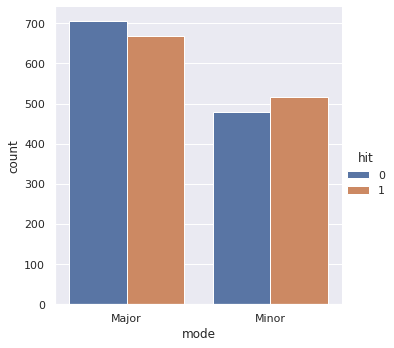

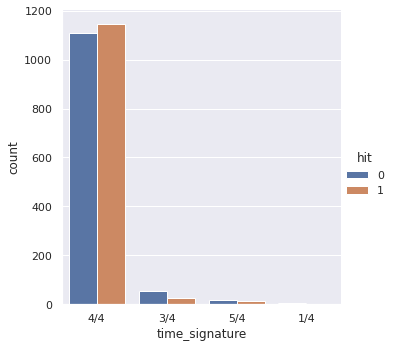

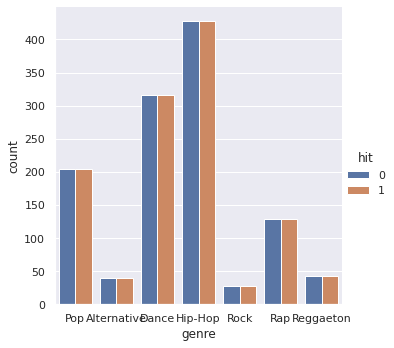

In [ ]:
audioCatFeatures = ["key", "mode", "time_signature", "genre"]
# no point in considering genre actually since we balanced the dataframe 
# by picking hit and no hit based on genre

for var in audioCatFeatures:
    sb.catplot(data = audioCatHitDF, x = var, hue="hit", kind = "count")   

Among categorical features, the key of the song appears to be the most effective in judging a hit song. Due to the nature of our data collection, we are not able to use the genre to determine whether a song would be a hit.

## 3) Do popular songs necessarily become hits? (XZ)

Using a decision tree, we try to find the relationship between popularity score and whether a song was a hit. 

In [ ]:
# split 80-20: train-test
# fit classification tree model on train set to see relationships between popularity and whether it was a hit
# find cut off point of popularity score for a song to be considered a hit
from sklearn.model_selection import train_test_split

hitDF = pd.DataFrame(mainDF["hit"])
popDF = pd.DataFrame(mainDF["popularity"])

hitTrain, hitTest, popTrain, popTest = train_test_split(hitDF, popDF, test_size=0.2, random_state=42)
print("Train Set:", hitTrain.shape, popTrain.shape)
print("Test Set:", hitTest.shape, popTest.shape)

Train Set: (1897, 1) (1897, 1)
Test Set: (475, 1) (475, 1)


<AxesSubplot:xlabel='popularity', ylabel='hit'>

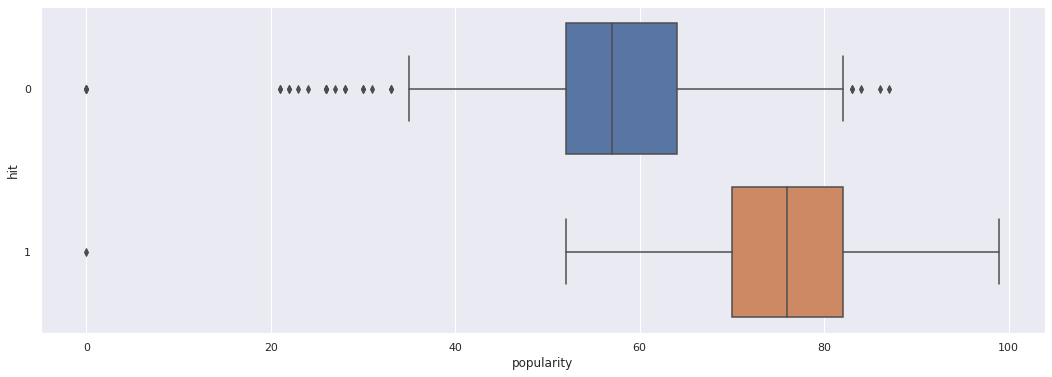

In [ ]:
trainDF = pd.concat([popTrain, hitTrain], axis = 1)

f = plt.figure(figsize=(18, 6))
sb.boxplot(x="popularity", y="hit", data=trainDF, orient="h")

[Text(0.5, 0.8333333333333334, 'Popularity <= 66.5\ngini = 0.5\nsamples = 1897\nvalue = [960, 937]\nclass = Not Hit'),
 Text(0.25, 0.5, 'Popularity <= 60.5\ngini = 0.254\nsamples = 924\nvalue = [786, 138]\nclass = Not Hit'),
 Text(0.125, 0.16666666666666666, 'gini = 0.106\nsamples = 622\nvalue = [587, 35]\nclass = Not Hit'),
 Text(0.375, 0.16666666666666666, 'gini = 0.449\nsamples = 302\nvalue = [199, 103]\nclass = Not Hit'),
 Text(0.75, 0.5, 'Popularity <= 75.5\ngini = 0.294\nsamples = 973\nvalue = [174, 799]\nclass = Hit'),
 Text(0.625, 0.16666666666666666, 'gini = 0.434\nsamples = 440\nvalue = [140, 300]\nclass = Hit'),
 Text(0.875, 0.16666666666666666, 'gini = 0.119\nsamples = 533\nvalue = [34, 499]\nclass = Hit')]

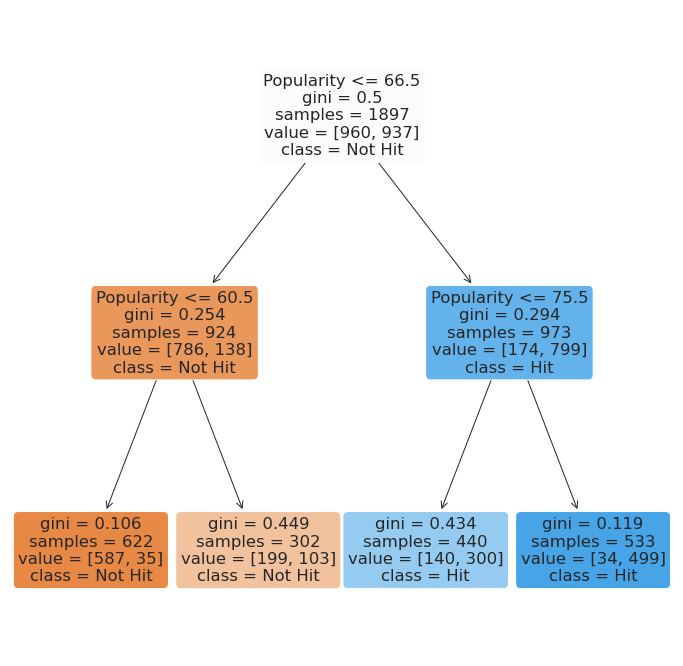

In [ ]:
hitPopTree = DecisionTreeClassifier(max_depth=2)
hitPopTree.fit(popTrain, hitTrain)

f = plt.figure(figsize=(12, 12))
plot_tree(hitPopTree, filled=True, rounded=True, feature_names=["Popularity"], class_names=["Not Hit", "Hit"])

Classification Accuracy:  0.8355297838692672


<AxesSubplot:>

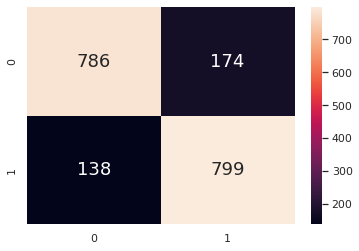

In [ ]:
hitTrainPred = hitPopTree.predict(popTrain)

print("Classification Accuracy: ", hitPopTree.score(popTrain, hitTrain))

sb.heatmap(confusion_matrix(hitTrain, hitTrainPred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Classification Accuracy:  0.8


<AxesSubplot:>

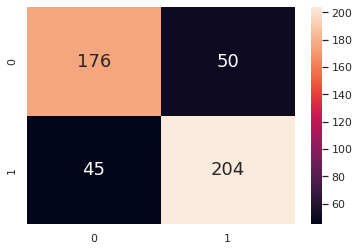

In [ ]:
hitTestPred = hitPopTree.predict(popTest)
print("Classification Accuracy: ", hitPopTree.score(popTest, hitTest))

sb.heatmap(confusion_matrix(hitTest, hitTestPred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Popularity does generally determine whether a song will be a hit or not. However, there are certain popular songs that did not emerge as hits or songs that were not popular but ended up as hits.

## Machine Learning with Algorithm Optimisation

We use machine learning to predict songs that fall into 3 categories - 1 for each problem below: The Overlooked, The Ones That Got Away and The Criminally Underrated. We try different models and algorithms and compare their performance.

## 4) Which popular songs were overlooked? (XZ)

Using the tree model from problem 3, we try to find non-hit songs that should have been hits based on their popularity score. These are songs that deserved a place on the top charts but were robbed - The Overlooked.

<AxesSubplot:>

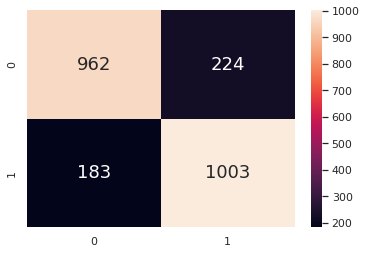

In [ ]:
# Look for songs that were not hit but is predicted to be hit
# Horizontal is Predicted, Vertical is actual
# Look for those in the top right quandrant

# use tree model from problem 3 and input mainDF
popularityFromMainDF = pd.DataFrame(mainDF['popularity'])
hitFromMainDF = pd.DataFrame(mainDF['hit'])
popularityFromMainDF_pred = hitPopTree.predict(popularityFromMainDF)

sb.heatmap(confusion_matrix(hitFromMainDF, popularityFromMainDF_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})


In [ ]:
overlooked_list = []
for index, row in mainDF.iterrows():
    if row['hit'] == 0 and popularityFromMainDF_pred[index] == 1:
        overlooked_list.append(row)

overlooked_dataFrame = pd.DataFrame(overlooked_list)
overlooked_dataFrame

,track_id,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,hit
8,5R2GAfpupefbMmCVXTvlIk,Pop,Virlan Garcia,En Donde Esta Tu Amor,74,0.5820,0.501,217429,0.400,0.000000,C,0.0692,-4.760,Major,0.0352,73.054,4/4,0.556,0
9,3LlAyCYU26dvFZBDUIMb7a,Rock,Imagine Dragons,Demons,74,0.1900,0.505,175200,0.710,0.000250,D#,0.3290,-3.015,Major,0.0321,89.938,4/4,0.428,0
20,1ydOxBgLmEMfWffu6t4H5x,Dance,Lennon Stella,Bad,68,0.3660,0.827,177973,0.613,0.000013,G#,0.0930,-5.340,Major,0.0621,137.960,4/4,0.747,0
46,7AIy2SEjip6FKhlSNMoMac,Pop,Camila,Te Confieso,71,0.2700,0.543,193915,0.332,0.000000,D,0.1150,-8.489,Major,0.0347,143.705,4/4,0.227,0
47,5rgrBsAFYMun6yhtnLKRPz,Hip-Hop,Bryson Tiller,Right My Wrongs,73,0.3440,0.538,249320,0.449,0.000000,C#,0.1570,-8.078,Major,0.0463,132.639,4/4,0.270,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2333,4JaLkM90MJutDAl5jD9BZX,Dance,One Direction,No Control,67,0.0278,0.558,199720,0.916,0.000000,C#,0.0296,-3.145,Minor,0.0839,142.984,4/4,0.850,0
2347,2SPoL0khkn8lcyE4krvzPx,Pop,GATTÜSO,Easy Boy,67,0.0144,0.617,205975,0.959,0.024000,B,0.1210,-3.080,Major,0.0480,127.036,4/4,0.134,0
2350,4Fv6wNYUixnYkj3Dgfrls8,Hip-Hop,G-Eazy,Tumblr Girls,67,0.1010,0.490,255680,0.373,0.000105,G#,0.1280,-9.762,Major,0.2600,121.889,4/4,0.346,0
2360,5E5MqaS6eOsbaJibl3YeMZ,Pop,Dua Lipa,Homesick,73,0.9480,0.426,230480,0.224,0.000000,F#,0.1120,-8.683,Major,0.0391,85.728,5/4,0.399,0


In [ ]:
# for API
tracks = overlooked_dataFrame["track_id"].values.tolist()
overlooked_playlist = {"uris": []}
for i in tracks:
    uri = "spotify:track:" + i
    overlooked_playlist["uris"].append(uri)

overlooked_playlist

{'uris': ['spotify:track:5R2GAfpupefbMmCVXTvlIk',
  'spotify:track:3LlAyCYU26dvFZBDUIMb7a',
  'spotify:track:1ydOxBgLmEMfWffu6t4H5x',
  'spotify:track:7AIy2SEjip6FKhlSNMoMac',
  'spotify:track:5rgrBsAFYMun6yhtnLKRPz',
  'spotify:track:1LV6zxUFIUyePwsdFHNIYA',
  'spotify:track:0M0FvSNRZmDz0Z769rewlI',
  'spotify:track:15qrWkkYCfmtu1uRpGf48L',
  'spotify:track:0xCA70t1ZA4fa9UOE0lIJm',
  'spotify:track:4IWGnyOHDrVZEtPWfs4s7q',
  'spotify:track:3YuaBvuZqcwN3CEAyyoaei',
  'spotify:track:7uJH0YdSZL6psjxI6Xy08b',
  'spotify:track:57lCa95tmjJ8EYdNTex8Kk',
  'spotify:track:7vDqM9MFCCAdeSSWQQdzT5',
  'spotify:track:5KL4iZkCTZyXl7KnHgfVDj',
  'spotify:track:1w7Xbv3It3oI7dz4OrKazn',
  'spotify:track:2y4XLIaQOPbBJQEr4r9L2Y',
  'spotify:track:6gLTlewjPtazYnOa9I5Bno',
  'spotify:track:4V9JDRqKjN8F2HWdlEDxvI',
  'spotify:track:0V4l4GQhgnWQGtCWpvA7va',
  'spotify:track:31om1lcOHbL5Iyxt4g5Hnf',
  'spotify:track:11bD1JtSjlIgKgZG2134DZ',
  'spotify:track:106VtwWCZbr6LyBiPT4Qmn',
  'spotify:track:2IjyFRCRn

## 5) Which songs sounded like hits but were not hits? (XZ)

With another decision tree using the top 3 audio features as predictors (from problem 2), we find the songs that sounded most like hits, but somehow didn't make the charts - The Ones That Got Away.

In [ ]:
# do classification tree model on train set to predict if a song will be a hit 
# based on the 3 most correlated audio features (from 2)
# use the same model on test set, predict songs that should have been hits
# make a playlist for top 10 songs that should have been hits

classification_accuracy_numerical_audio_features_list.sort(key = lambda x: x[1], reverse=True)

feature1, feature2, feature3 = classification_accuracy_numerical_audio_features_list[:3]

print(feature1[0])
print(feature2[0])
print(feature3[0])

valence
liveness
instrumentalness


Looking at the numerical features that provides the highest classification accuracy, we will then look to use these variable to predict whether certain songs would have been hits

## Multi-Variate Classification Tree  

Response Variable : **Hit**     
Predictor Feature : **Valence, Liveness, Instrumentalness**       

Extract the variables and the associated data as a Pandas `DataFrame`.

In [ ]:
# Extract Response and Predictors
gotAway_Response = pd.DataFrame(mainDF["hit"])
gotAway_Predictors = pd.DataFrame(mainDF[[feature1[0], feature2[0], feature3[0]]])

gotAway_visualiser = pd.concat([gotAway_Response, gotAway_Predictors], axis=1)
gotAway_visualiser

,hit,valence,liveness,instrumentalness
0,0,0.8140,0.1350,0.000000
1,0,0.9630,0.1820,0.000182
2,1,0.2090,0.1630,0.000000
3,1,0.4510,0.2130,0.000009
4,1,0.0883,0.1250,0.021400
...,...,...,...,...
2367,0,0.8920,0.2940,0.000000
2368,1,0.9330,0.0949,0.000000
2369,0,0.0686,0.0929,0.000389
2370,1,0.2530,0.1150,0.000000


In [ ]:

# Split the Dataset into Train and Test
gotAway_Response_train, gotAway_Response_test, gotAway_Predictors_train, gotAway_Predictors_test = train_test_split(gotAway_Response, gotAway_Predictors, test_size = 0.20)

# Check the sample sizes
print("Train Set :", gotAway_Response_train.shape, gotAway_Predictors_train.shape)
print("Test Set  :", gotAway_Response_test.shape, gotAway_Predictors_test.shape)

Train Set : (1897, 1) (1897, 3)
Test Set  : (475, 1) (475, 3)


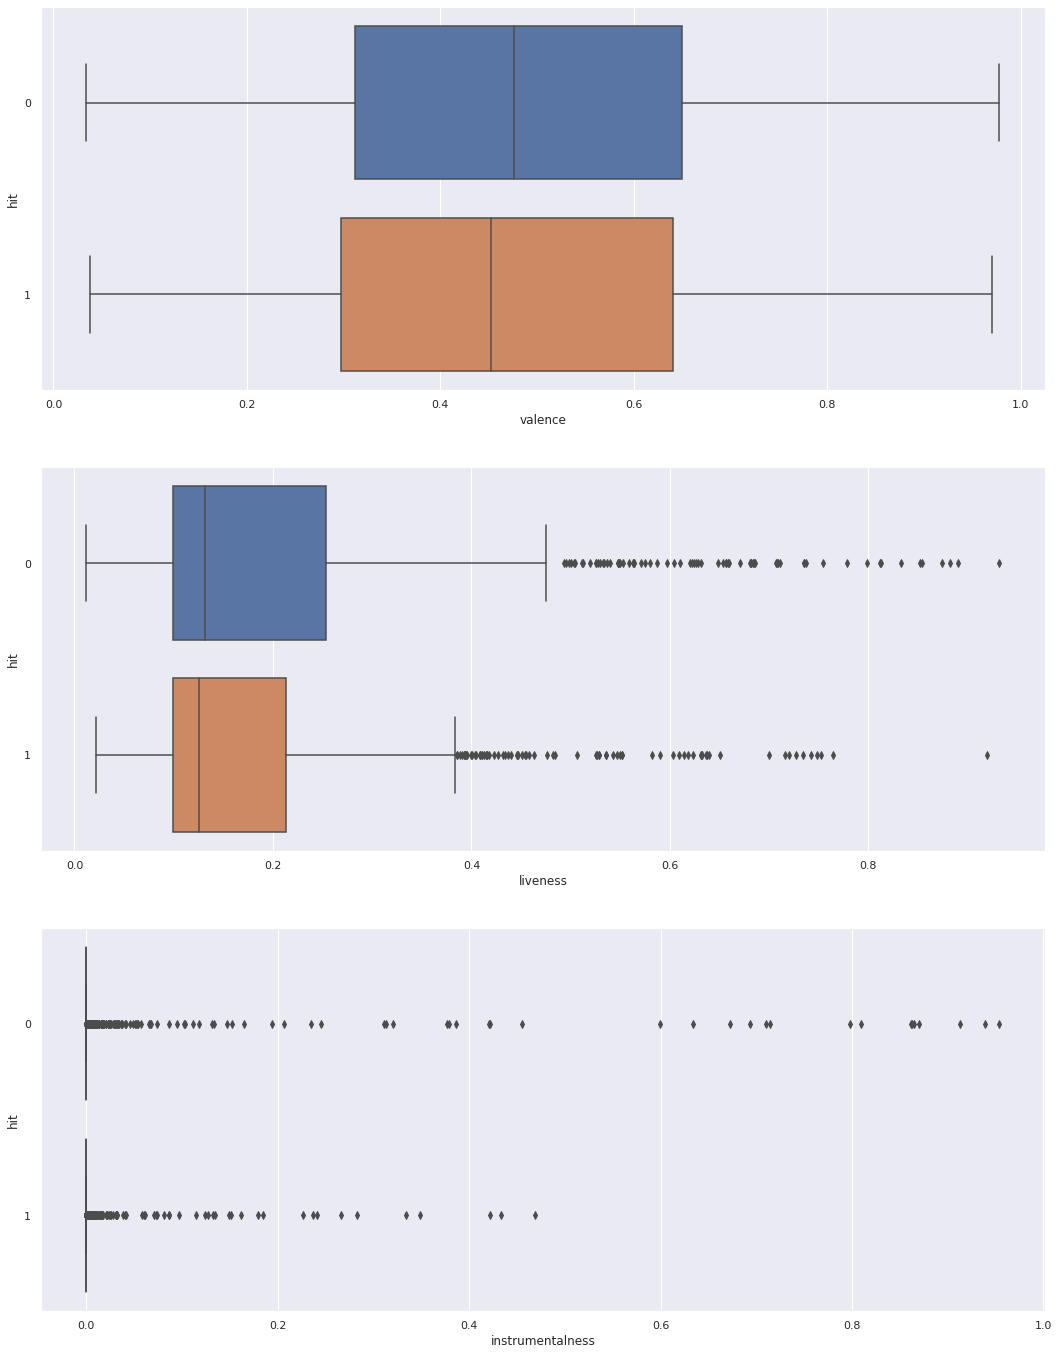

In [ ]:
# Relationship between Response and the Predictors
f, axes = plt.subplots(3, 1, figsize=(18, 24))

count = 0
for var in gotAway_Predictors:
    sb.boxplot(x = var, y = "hit", data = mainDF, orient = "h", ax = axes[count])
    count += 1

[Text(0.5, 0.8333333333333334, 'liveness <= 0.464\ngini = 0.5\nsamples = 1897\nvalue = [969, 928]\nclass = Not Hit'),
 Text(0.25, 0.5, 'instrumentalness <= 0.534\ngini = 0.5\nsamples = 1807\nvalue = [905, 902]\nclass = Not Hit'),
 Text(0.125, 0.16666666666666666, 'gini = 0.5\nsamples = 1796\nvalue = [894, 902]\nclass = Hit'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]\nclass = Not Hit'),
 Text(0.75, 0.5, 'valence <= 0.509\ngini = 0.411\nsamples = 90\nvalue = [64, 26]\nclass = Not Hit'),
 Text(0.625, 0.16666666666666666, 'gini = 0.471\nsamples = 50\nvalue = [31, 19]\nclass = Not Hit'),
 Text(0.875, 0.16666666666666666, 'gini = 0.289\nsamples = 40\nvalue = [33, 7]\nclass = Not Hit')]

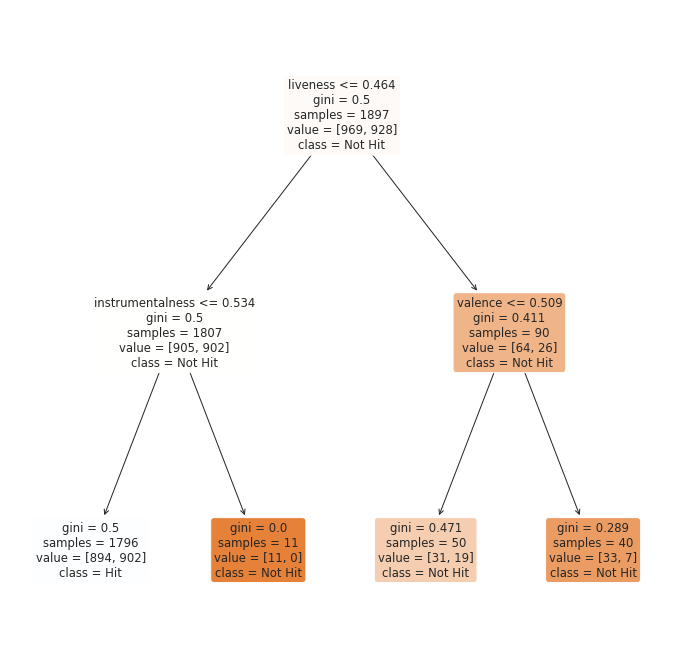

In [ ]:
# Decision Tree using Train Data
gotAway_tree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
gotAway_tree.fit(gotAway_Predictors_train, gotAway_Response_train)                  # train the decision tree model

f = plt.figure(figsize=(12,12))
plot_tree(gotAway_tree, filled=True, rounded=True, 
          feature_names=gotAway_Predictors.columns, 
          class_names=["Not Hit","Hit"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.5150237216657881

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5494736842105263



<AxesSubplot:>

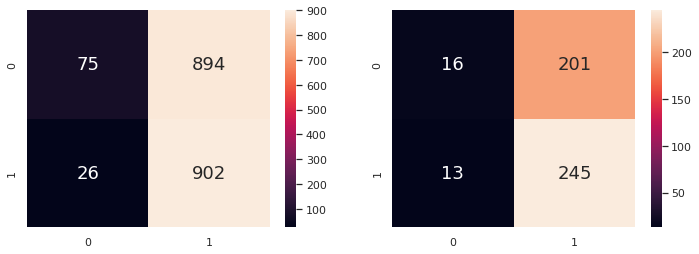

In [ ]:
# Predict Hit or Not Hit corresponding to Prediction Variables
gotAway_Response_train_pred = gotAway_tree.predict(gotAway_Predictors_train)
gotAway_Response_test_pred = gotAway_tree.predict(gotAway_Predictors_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", gotAway_tree.score(gotAway_Predictors_train, gotAway_Response_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", gotAway_tree.score(gotAway_Predictors_test, gotAway_Response_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(gotAway_Response_train, gotAway_Response_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(gotAway_Response_test, gotAway_Response_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

<AxesSubplot:>

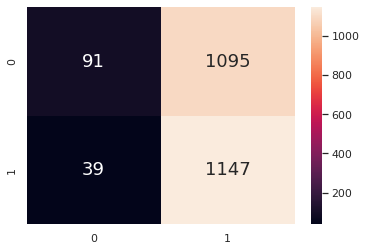

In [ ]:
# use tree model from above and input mainDF
top3FeaturesFromMainDF = pd.DataFrame(mainDF[[feature1[0], feature2[0], feature3[0]]])
hitFromMainDF = pd.DataFrame(mainDF['hit'])
top3FeaturesFromMainDF_pred = gotAway_tree.predict(top3FeaturesFromMainDF)

sb.heatmap(confusion_matrix(hitFromMainDF, top3FeaturesFromMainDF_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [ ]:
gotAway_list = []
for index, row in mainDF.iterrows():
    if row['hit'] == 0 and top3FeaturesFromMainDF_pred[index] == 1:
        gotAway_list.append(row)

gotAway_dataFrame = pd.DataFrame(gotAway_list)
gotAway_dataFrame

,track_id,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,hit
0,0jMo6rlrSGVRIipK0isKFL,Pop,Filmore,Country Song,59,0.0523,0.619,166739,0.684,0.000000,C#,0.1350,-5.616,Major,0.0441,95.990,4/4,0.8140,0
1,41NPmOc9fdROE5o1BpCn2w,Pop,LEGADO 7,El Doble M,60,0.5170,0.804,146749,0.810,0.000182,G,0.1820,-2.709,Major,0.0410,109.928,3/4,0.9630,0
6,4agp6oHofabdUedr0B1krj,Pop,Len,Steal My Sunshine,61,0.3940,0.413,265533,0.829,0.000000,E,0.1080,-11.111,Major,0.5290,191.477,4/4,0.6770,0
8,5R2GAfpupefbMmCVXTvlIk,Pop,Virlan Garcia,En Donde Esta Tu Amor,74,0.5820,0.501,217429,0.400,0.000000,C,0.0692,-4.760,Major,0.0352,73.054,4/4,0.5560,0
9,3LlAyCYU26dvFZBDUIMb7a,Rock,Imagine Dragons,Demons,74,0.1900,0.505,175200,0.710,0.000250,D#,0.3290,-3.015,Major,0.0321,89.938,4/4,0.4280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2361,7ucHluyZPqhi2nzdWCCVNm,Hip-Hop,Paris,OVER,54,0.0589,0.671,110040,0.676,0.000000,D#,0.0674,-6.172,Minor,0.0448,140.070,4/4,0.3430,0
2365,02SQcBSULnUUm3QHxbF8H9,Dance,Kim Wilde,Kids In America,54,0.0762,0.565,205640,0.853,0.000000,E,0.1650,-2.333,Major,0.0519,159.332,4/4,0.3380,0
2367,6yly6C4QeDi4N1CpnFrJc7,Hip-Hop,Santa Estilo,Pesao,67,0.2380,0.720,208027,0.721,0.000000,G,0.2940,-4.564,Minor,0.2620,173.432,4/4,0.8920,0
2369,1npAUoLKDnpqpjyDDHmI1j,Hip-Hop,Oliver Francis,Headphones,56,0.2750,0.389,223412,0.559,0.000389,E,0.0929,-9.530,Minor,0.1260,77.868,4/4,0.0686,0


In [ ]:
# for API
tracks = gotAway_dataFrame["track_id"].values.tolist()
gotAway_playlist = {"uris": []}
for i in tracks:
    uri = "spotify:track:" + i
    gotAway_playlist["uris"].append(uri)

gotAway_playlist

{'uris': ['spotify:track:0jMo6rlrSGVRIipK0isKFL',
  'spotify:track:41NPmOc9fdROE5o1BpCn2w',
  'spotify:track:4agp6oHofabdUedr0B1krj',
  'spotify:track:5R2GAfpupefbMmCVXTvlIk',
  'spotify:track:3LlAyCYU26dvFZBDUIMb7a',
  'spotify:track:6rkxqfBaK44eZWIfTcASb3',
  'spotify:track:6HFKeEGEJGI0rIyg2r0iLo',
  'spotify:track:528CAH5pTLq86oZ52fHifA',
  'spotify:track:1ydOxBgLmEMfWffu6t4H5x',
  'spotify:track:6oap7i6E7uqmyIxG0nplVI',
  'spotify:track:4H20Cd4jvIZsdOKnFuCGAM',
  'spotify:track:2XLdbJRfl2UHHzIurEFgAA',
  'spotify:track:1zpLBaEx3KX98Cknyi9Ai1',
  'spotify:track:49xZPPqyBHvDCx6WmcL2EB',
  'spotify:track:22BwaoGHQOTfFhHTndm7DQ',
  'spotify:track:7IsEXPk6qqt30FfQv4SZMa',
  'spotify:track:2FkfBkpwDdtEGqyyOtpghT',
  'spotify:track:7AIy2SEjip6FKhlSNMoMac',
  'spotify:track:5rgrBsAFYMun6yhtnLKRPz',
  'spotify:track:1LV6zxUFIUyePwsdFHNIYA',
  'spotify:track:3qRHCvn70YpVFFkx3lrAYf',
  'spotify:track:1UmqCjLXjTwPmuTeaopDQh',
  'spotify:track:508lUjbGcPrL0CfvHC7UvI',
  'spotify:track:3zCbbePDs

## 6) Which songs were criminally underrated? (WB)

We try to predict a song's popularity score based on its top 3 audio features (from problem 1). We then find the outliers, songs that were predicted to be popular, yet did not receive as much love in actuality - The Criminally Underrated.

In [ ]:
# on train set, do linear reg to predict a song’s popularity score 
# based on 3 most correlated features (from 1)
# use the same model on test set, predict  popularity score
# find songs with predicted popularity score >> actual score
# rank these songs by descending order of difference btw predicted and actual popularity score
# make a playlist for top 10 underrated songs

# Extract response and predictors
y = pd.DataFrame(songsDF["popularity"])
X = pd.DataFrame(songsDF[["acousticness", "energy", "loudness"]])
# X = pd.DataFrame(songsDF[["acousticness", "energy", "loudness", "danceability", "duration_ms", 
# "instrumentalness", "liveness", "speechiness", "tempo", "valence"]])


# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [59.42994128]
Coefficients of Regression 	: a =  [[-15.93762473 -16.10110025   0.7859261 ]]



,Predictors,Coefficients
0,acousticness,-15.937625
1,energy,-16.101100
2,loudness,0.785926


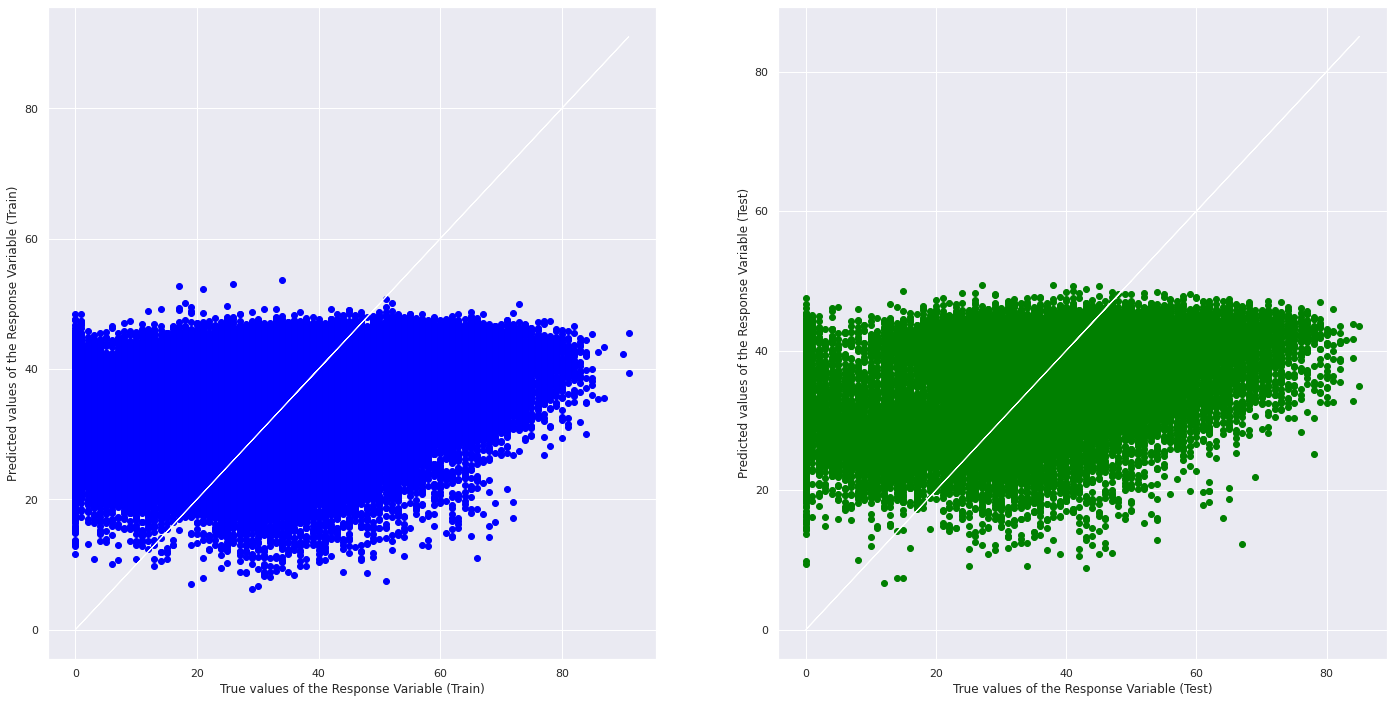

In [ ]:
# Predict the popularity scores from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [ ]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.15436503358718823
Mean Squared Error (MSE) 	: 247.44597522648337

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.16208789309174843
Mean Squared Error (MSE) 	: 247.77322694254892



The explained variance seems quite low. Let us see if using all the variables to predict popularity would yield better results

In [ ]:
# Extract response and predictors
y = pd.DataFrame(songsDF["popularity"])
X = pd.DataFrame(songsDF[["acousticness", "energy", "loudness", "danceability", "duration_ms", 
"instrumentalness", "liveness", "speechiness", "tempo", "valence"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.1978398102527188
Mean Squared Error (MSE) 	: 234.95523791085395

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.18873244317880278
Mean Squared Error (MSE) 	: 238.9641925924578



Although now the explained variance is now higher, and MSE is lower, the model is still not very good. Perhaps a discrete popularity score from 0 to 100 is too difficult for a model to predict. Classification could be a better option to allow more space for a model to manoeuvre.

### Predicting Popularity by Classifying Popularity Scores

We first evenly split the dataset into 3 classes by popularity score

In [ ]:
pd.cut(songsDF['popularity'], bins=3, labels = ["unpopular", "average", "popular"]).value_counts()

average      100069
unpopular     63252
popular       12267
Name: popularity, dtype: int64

Since the bins are not equally sized, RandomOverSampler can be used to resize the unevenly distributed classes. This ensures that the data that will be fed into the classification model is balanced. 

In [ ]:
#  replace popularity score with popularity class
songsDF['popularity'] = pd.cut(songsDF.popularity, bins = 3, labels = ["unpopular", "average", "popular"])
songsDF

,track_id,genre,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0BRjO6ga9RKCKjfDqeFgWV,Movie,Henri Salvador,C'est beau de faire un Show,unpopular,0.6110,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,0BjC1NfoEOOusryehmNudP,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),unpopular,0.2460,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,0CoSDzoNIKCRs124s9uTVy,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,unpopular,0.9520,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,0Gc6TVm52BwZD07Ki6tIvf,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,unpopular,0.7030,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,0IuslXpMROHdEPvSl1fTQK,Movie,Fabien Nataf,Ouverture,unpopular,0.9500,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232716,1U0OMWvR89Cm20vCNar50f,Soul,John Legend,Quickly (feat. Brandy),average,0.2310,0.736,222667,0.701,0.000000,A#,0.2030,-4.345,Minor,0.1000,99.991,4/4,0.770
232717,2gGqKJWfWbToha2YmDxnnj,Soul,Belly,P.O.P.,average,0.1040,0.802,201173,0.516,0.000485,D,0.1050,-9.014,Major,0.2130,175.666,4/4,0.482
232719,2iZf3EUedz9MPqbAvXdpdA,Soul,"Bobby ""Blue"" Bland",I'll Take Care Of You - Single Version,average,0.5660,0.423,144667,0.337,0.000000,A#,0.2760,-13.092,Minor,0.0436,80.023,4/4,0.497
232721,1qWZdkBl4UVPj9lK6HuuFM,Soul,Jr Thomas & The Volcanos,Burning Fire,average,0.0329,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969


In [ ]:
X = songsDF.drop(columns='popularity')[["acousticness", "energy", "loudness"]]
y = songsDF.popularity

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X,y)

y_ros.value_counts()

unpopular    100069
average      100069
popular      100069
Name: popularity, dtype: int64

In [ ]:
X_ros.value_counts()

acousticness  energy  loudness
0.219         0.261   -19.846     26
0.558         0.418   -10.065     24
0.144         0.671   -5.159      23
0.907         0.257   -12.358     22
0.338         0.559   -5.135      21
                                  ..
0.131         0.713   -6.792       1
              0.714   -3.957       1
              0.717   -5.844       1
              0.719   -5.918       1
0.291         0.411   -9.528       1
Length: 174853, dtype: int64

In [ ]:
#split dataset into train and test data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)


from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
# print(accuracy_score(y_test, y_pred_class))
knn.score(X_test,y_test)

0.7840011991605876

The accuracy score obtained for a number of neighbours = 1 seems to be very high, which might not be a good thing as it could be a case of overfitting. The optimal n_neighbours can be found using GridSearch.

In [ ]:
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)
#check top performing n_neighbors value
knn_gscv.best_params_

KeyboardInterrupt: 

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.6155887290494491

This is still a good prediction accuracy, far more promising than using a linear regression model with an R^2 of only 0.2. We will use this knn model again on our original dataset, with n_neighbours value of 23, and pick out the criminally underrated!

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train)
y_test_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)
y_train_pred


array(['average', 'average', 'unpopular', ..., 'unpopular', 'average',
       'average'], dtype=object)

In [ ]:
X_train

,acousticness,energy,loudness
39945,0.261000,0.745,-11.084
158528,0.269000,0.705,-5.550
173311,0.734000,0.680,-13.484
47020,0.125000,0.638,-7.262
52837,0.023600,0.851,-5.385
...,...,...,...
163084,0.132000,0.848,-3.612
136127,0.000098,0.879,-5.514
175914,0.810000,0.813,-4.409
191910,0.190000,0.607,-7.353


In [ ]:
#  recombine into dataset
df1 = pd.DataFrame(y_test_pred, columns=["predicted_popularity"])
df2 = pd.DataFrame(y_train_pred, columns=["predicted_popularity"])
predDF = pd.concat([df1, df2], axis=0)
respDF = pd.concat([X_test, X_train], axis=0)
predDF

,predicted_popularity
0,average
1,average
2,average
3,average
4,unpopular
...,...
140465,average
140466,average
140467,unpopular
140468,average


In [ ]:
originalDF = pd.merge(respDF, songsDF, left_index=True, right_index=True)
originalDF


,acousticness_x,energy_x,loudness_x,track_id,genre,artist_name,track_name,popularity,acousticness_y,danceability,...,energy_y,instrumentalness,key,liveness,loudness_y,mode,speechiness,tempo,time_signature,valence
39398,0.109000,0.6660,-12.668,4V282LX9jhbY4wdZ4NdP5V,Electronic,Weval,One,average,0.109000,0.570,...,0.6660,0.799000,G,0.0306,-12.668,Major,0.0423,113.981,4/4,0.0591
696,0.173000,0.4440,-14.090,17zj9e1nYLJaKjqKuwWCht,Country,"Hank Williams, Jr.",Old Habits,average,0.173000,0.633,...,0.4440,0.000003,D,0.0821,-14.090,Major,0.0264,106.111,3/4,0.4500
53179,0.032400,0.7090,-10.858,32mPKymSO6MZQ8BuYVERXM,Blues,Jimi Hendrix,Electric Church Red House,unpopular,0.032400,0.300,...,0.7090,0.036800,G,0.0773,-10.858,Major,0.0765,148.249,4/4,0.5600
44892,0.711000,0.2780,-13.018,1vlt1z8Ez6SueIfCE2pm9A,Folk,Ásgeir,Going Home,average,0.711000,0.423,...,0.2780,0.603000,G#,0.1110,-13.018,Minor,0.0358,180.074,1/4,0.2890
80918,0.986000,0.0487,-22.156,2zdDMoUY2Q6oJxRONOIJop,Opera,Arrigo Boito,"Mefistofele / Act 3: ""L'altra notte in fondo a...",unpopular,0.986000,0.164,...,0.0487,0.004430,C,0.1140,-22.156,Major,0.0522,77.502,3/4,0.0350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163084,0.132000,0.8480,-3.612,3s2FbP2Bl4OR7nJGDe7PyZ,Reggaeton,Baby Rasta & Gringo,Voy a La Disco,unpopular,0.132000,0.862,...,0.8480,0.000000,C,0.1650,-3.612,Minor,0.1420,92.032,4/4,0.6670
136127,0.000098,0.8790,-5.514,6SKjmrTO1ZPE8zuttg1iLe,Reggae,Ocean Alley,Those Daze,average,0.000098,0.352,...,0.8790,0.001990,C#,0.0981,-5.514,Major,0.0634,73.838,4/4,0.2350
175914,0.810000,0.8130,-4.409,4loyRWPtFAWNqmqeCFF6lF,Comedy,Kyle Cease,"Things You Need To Forget, Asian Painter",unpopular,0.810000,0.541,...,0.8130,0.000000,F,0.7630,-4.409,Minor,0.8460,87.750,3/4,0.5400
191910,0.190000,0.6070,-7.353,5Iu1BSrMiN46URHGRMPVH0,Ska,The Selector,Reality Superstar,unpopular,0.190000,0.870,...,0.6070,0.008160,G#,0.0712,-7.353,Major,0.2310,92.005,4/4,0.6950


In [ ]:
originalDF.reset_index(inplace=True, drop=True)
predDF.reset_index(inplace=True, drop=True)

finalDF = pd.concat([originalDF,predDF], axis=1)
finalDF = finalDF[["track_id", "genre", "artist_name", "track_name", "popularity", "predicted_popularity"]]
finalDF

,track_id,genre,artist_name,track_name,popularity,predicted_popularity
0,4V282LX9jhbY4wdZ4NdP5V,Electronic,Weval,One,average,average
1,17zj9e1nYLJaKjqKuwWCht,Country,"Hank Williams, Jr.",Old Habits,average,average
2,32mPKymSO6MZQ8BuYVERXM,Blues,Jimi Hendrix,Electric Church Red House,unpopular,average
3,1vlt1z8Ez6SueIfCE2pm9A,Folk,Ásgeir,Going Home,average,average
4,2zdDMoUY2Q6oJxRONOIJop,Opera,Arrigo Boito,"Mefistofele / Act 3: ""L'altra notte in fondo a...",unpopular,unpopular
...,...,...,...,...,...,...
175583,3s2FbP2Bl4OR7nJGDe7PyZ,Reggaeton,Baby Rasta & Gringo,Voy a La Disco,unpopular,average
175584,6SKjmrTO1ZPE8zuttg1iLe,Reggae,Ocean Alley,Those Daze,average,average
175585,4loyRWPtFAWNqmqeCFF6lF,Comedy,Kyle Cease,"Things You Need To Forget, Asian Painter",unpopular,unpopular
175586,5Iu1BSrMiN46URHGRMPVH0,Ska,The Selector,Reality Superstar,unpopular,average


We will narrow down our sample to the top 4 genres Pop, Rap, Hip-Hop and Dance, which have distribution skewed more towards higher popularity scores. 

In [ ]:
underrated = finalDF[(finalDF["predicted_popularity"] == "popular") & ((finalDF["popularity"] == "unpopular")|(finalDF["popularity"] == "average"))]
underrated

,track_id,genre,artist_name,track_name,popularity,predicted_popularity
5823,1DonCytH3yNWUwXTMg3JNd,Country,JB and The Moonshine Band,The Only Drug,average,popular
7772,0gpFiquPvir7e3RrM4kii9,Hip-Hop,Keith Ape,"IT G MA REMIX (feat. A$AP Ferg, Father, Dumbfo...",average,popular
18299,1XlRA078Zp2Q0IfWliK42q,Dance,Madcon,Don't Worry (feat. Ray Dalton),average,popular
53082,47NlRpC3AJOr1gndyosZTy,Reggae,Morgan Heritage,Dancing in the Moonlight,unpopular,popular
61186,5DxL8Cdx6WqjN1Btu5TJR5,Hip-Hop,NB Ridaz,4-Ever,average,popular
72606,0PFfAiEFREC6PugLPN03aa,Alternative,The Goo Goo Dolls,Use Me,average,popular
104716,0sX1K82BiC9pRkqx7OxnFz,Electronic,Falcons,Buyaka,unpopular,popular
120800,2zJmYDvL4DDhSFnlQ3cgnR,Reggae,Midnite,Same I Ah One,unpopular,popular
133322,0TaZMMTulwD1m6kbN6UCgW,Reggaeton,Los De La Nazza,Abracadabra (feat. Kendo Kaponi),average,popular
147936,5qwFrTYdnbrvkjW5sQgzr0,Reggaeton,Tony Lenta,Pa'lante,unpopular,popular


In [ ]:
# for API
tracks = underrated["track_id"].values.tolist()
req = {"uris": []}
for i in tracks:
    uri = "spotify:track:" + i
    req["uris"].append(uri)

req

{'uris': ['spotify:track:1DonCytH3yNWUwXTMg3JNd',
  'spotify:track:0gpFiquPvir7e3RrM4kii9',
  'spotify:track:1XlRA078Zp2Q0IfWliK42q',
  'spotify:track:47NlRpC3AJOr1gndyosZTy',
  'spotify:track:5DxL8Cdx6WqjN1Btu5TJR5',
  'spotify:track:0PFfAiEFREC6PugLPN03aa',
  'spotify:track:0sX1K82BiC9pRkqx7OxnFz',
  'spotify:track:2zJmYDvL4DDhSFnlQ3cgnR',
  'spotify:track:0TaZMMTulwD1m6kbN6UCgW',
  'spotify:track:5qwFrTYdnbrvkjW5sQgzr0',
  'spotify:track:4MrtFJI2CDTRJs9FXpBdGo']}

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b4c1974f-2461-4ca8-aecf-ce1d02f67451' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>